# Homework3: Variational inference and VAE

## Task 1: Theory (5pt)

### Problem 1: Log-derivative trick (1pt)

In Lecture 3 we encountered a problem with Monte Carlo estimation during deriving the ELBO gradient at the E-step of EM-algorithm. Our density function $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})$ depends on the gradient parameters $\boldsymbol{\phi}$.
\begin{align*}
    \nabla_{\boldsymbol{\phi}} \mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta}) &= \nabla_{\boldsymbol{\phi}} \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \left[\log p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta}) - \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) \right] d \mathbf{z} \\
    & \neq  \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \nabla_{\boldsymbol{\phi}} \left[\log p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta}) - \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) \right] d \mathbf{z} \\
\end{align*}
The Reparametrization trick allowed us to pass the gradient inside the integral and get a Monte Carlo estimate. 

However, there is another way to achive this. It is called **log-derivative trick**:
$$
    \nabla_\xi  \log q(\eta| \xi) = \frac{\nabla_\xi q(\eta| \xi)}{q(\eta| \xi)}.
$$

1. Get the Monte Carlo estimate of the gradient using the formula for the derivative of the logarithm.

2. The final expression often works significantly worse than the reparametrization trick. Namely, it has a huge variance. Try to describe the intuition why the evaluation has a high variance (you need to think about what order and sign the terms in the expression will have).

```
your solution
```

### Problem 2: IWAE theory (1pt)

In Lecture 4 we discussed [IWAE](https://arxiv.org/abs/1509.00519) model. This model introduces the improved version of the variational lower bound (ELBO):

$$
    \mathcal{L}_K (q, \boldsymbol{\theta})  = \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K \sim q(\mathbf{z} | \mathbf{x})} \log \left( \frac{1}{K}\sum_{k=1}^K\frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x})} \right) \rightarrow \max_{q, \boldsymbol{\theta}}.
$$

Here we had the theorem without proof:

1. $\log p(\mathbf{x} | \boldsymbol{\theta}) \geq \mathcal{L}_K (q, \boldsymbol{\theta}) \geq \mathcal{L}_M (q, \boldsymbol{\theta}), \quad \text{for } K \geq M$;
2.  $\log p(\mathbf{x} | \boldsymbol{\theta}) = \lim_{K \rightarrow \infty} \mathcal{L}_K (q, \boldsymbol{\theta})$ if $\frac{p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta})}{q(\mathbf{z} | \mathbf{x})}$ is bounded.

Now it is time to prove it :)

**Hints:**
1. First part of the theorem.

    (a) Use the following equation inside the logarithm of $\mathcal{L}_K (q, \boldsymbol{\theta})$
$$
    \frac{a_1 + \dots + a_K}{K} = \mathbb{E}_{k_1, \dots, k_M} \frac{a_{k_1} + \dots + a_{k_M}}{M}, \quad k_1, \dots, k_M \sim U[1, K]
$$
    (b) Apply Jensen' inequality.
3. Second part of the theorem: use the Law of large numbers.


```
your solution
```

### Problem 3: EM-algorithm for GMM (3pt)

**Do not worry:** the task is long-written, but it is very useful for the understanding of the EM-algorithm and it is not very hard :)

Recall the Gaussian Mixture Model (GMM) we discussed in Seminar 4: 

- model parameters $\boldsymbol{\theta} = \{ \boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K}, \boldsymbol{\Sigma}_{1:K} \}$;

- prior distribution (note that here it also depends on $\boldsymbol{\theta}$) $p(z | \boldsymbol{\theta}) = \text{Categorical}(\pi_1, \dots \pi_K)$;

- generative distribution $p(\mathbf{x} | z, \boldsymbol{\theta}) = \mathcal{N}\left(\mathbf{x}|, \boldsymbol{\mu}_z, \boldsymbol{\Sigma}_z\right)$.

Given samples $\boldsymbol{X} = \{\mathbf{x}_1, \dots, \mathbf{x}_n\} \sim p(\mathbf{x})$ , $\mathbf{x}_i \in \mathbb{R}^m$ we want to fit GMM model via **MLE**:

$$
\boldsymbol{\theta}^{*} = \arg\max\limits_{\boldsymbol{\theta}} \log p(\boldsymbol{X} | \boldsymbol{\theta}) = \arg\max\limits_{\boldsymbol{\theta}}\sum\limits_{i = 1}^{n} \log \left(\sum\limits_{k = 1}^{K}  \pi_k \mathcal{N}\left(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right)\right).
$$

The direct solution of the problem above is hard and we substitute **MLE** optimization with **ELBO** optimization:

$$
\boldsymbol{\theta}^{\#} = \arg\max\limits_{q, \boldsymbol{\theta}} \mathcal{L}(q, \boldsymbol{\theta}) = \arg\max\limits_{q, \boldsymbol{\theta}} \int\limits_{Z^n} q(z_1, \dots, z_n) \log\frac{ p(\mathbf{x}_1, z_1, \dots, \mathbf{x}_n, z_n | \boldsymbol{\theta}) }{ q(z_1, \dots, z_n) } \prod\limits_{i = 1}^{n} d z_i.
$$

Since the pairs $(\mathbf{x}_1, z_1), \dots ,(\mathbf{x}_N, z_n)$ are mutually independent, the distributions could be factorized:
$$
    q(z_1, \dots, z_n) = \prod_{i=1}^n q(z_i); \quad p(\mathbf{x}_1, z_1, \dots, \mathbf{x}_n, z_n | \boldsymbol{\theta}) = \prod_{i=1}^n p(\mathbf{x}_i, z_i | \boldsymbol{\theta}).
$$
$$
\mathcal{L}(q, \boldsymbol{\theta}) = \sum\limits_{i = 1}^{n} \int\limits_{Z} q(z_i) \log\frac{ p(\mathbf{x}_i, z_i | \boldsymbol{\theta}) }{ q(z_i) } d z_i.
$$

In the equations above we treet $q(\cdot)$ as continuous density function. In our case $q(\cdot)$ is discrete categorical distribution and all integrals are substituted with the corresponding sums: 

$$
\int\limits_{Z} f(z) q(z) dz \longrightarrow \sum\limits_{k = 1}^{K} f(k) q(\{z = k\}).
$$

**ELBO** optimization could be done via EM-algorithm:

#### EM-algorithm

* **E-step**

    $$
    q(z_i) = p(z_i | \mathbf{x}_i, \boldsymbol{\theta}^{\text{prev}}).
    $$
    
    Note, that $q(z_i)$ is a categorical distribution over $K$ components: $q(z_i) = \text{Categorical}(\xi_1^i, \xi_2^i, \dots \xi_K^i)$.

* **M-step**

    $$
    \boldsymbol{\theta}^{\text{new}} = \arg\max\limits_{\boldsymbol{\theta}} \sum\limits_{i = 1}^{n} E_{z_i \sim q(z_i)} \log p(\mathbf{x}_i, z_i | \boldsymbol{\theta}) = \arg\max\limits_{\boldsymbol{\theta}} \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} q(\{z_i = k\}) \log p(\mathbf{x}_i, \{z_i = k\} | \boldsymbol{\theta}).
    $$
    
#### E- and M- steps derivations
    
Recall the derivation of **E-step** from the class:

$$
q(\{z_i = k\}) = \xi_k^i = p(\{z = k\} | \mathbf{x}_i, \boldsymbol{\theta}^{\text{prev}}) \overset{\text{Bayes theorem}}{=} \frac{\pi_k \mathcal{N}(\mathbf{x}_i | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)}{\sum\limits_{k' = 1}^{K} \pi_{k'} \mathcal{N}(\mathbf{x}_i | \boldsymbol{\mu}_{k'}, \boldsymbol{\Sigma}_{k'})}.
$$

**M-step** is a bit harder. Let's denote

$$ 
\Phi\left(\boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K} , \boldsymbol{\Sigma}_{1:K}\right) := \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} q(\{z_i = k\}) \log p(\mathbf{x}_i, \{z_i = k\} | \boldsymbol{\theta}) =\\= \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} \xi_k^i \left(\log \pi_k - \frac{m}{2} \log 2 \pi - \frac{1}{2} \log \det \boldsymbol{\Sigma}_k - \frac{1}{2} (\mathbf{x}_i - \boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x}_i - \boldsymbol{\mu}_k)\right).
$$

Let's maximize $\Phi(\cdot)$ with respect to parameters $\boldsymbol{\pi}_{1:K}$, $\boldsymbol{\mu}_{1:K}$, $\boldsymbol{\Sigma}_{1:K}$ separately:

1. Maximization with respect to $\boldsymbol{\pi}_{1:K}$:
$$
\arg\max\limits_{\boldsymbol{\pi}_{1:K}; \, \pi_k > 0 \\ \sum\limits_{k = 1}^{K} \pi_k = 1} \Phi\left(\boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K} , \boldsymbol{\Sigma}_{1:K}\right) = \arg\max\limits_{\boldsymbol{\pi}_{1:K}; \, \pi_k > 0 \\ \sum\limits_{k = 1}^{K} \pi_k = 1} \sum\limits_{i = 1}^{n} \sum\limits_{k = 1}^{K} \xi_k^i \log \pi_k = \arg\max\limits_{\boldsymbol{\pi}_{1:K}; \, \pi_k > 0 \\ \sum\limits_{k = 1}^{K} \pi_k = 1} \sum\limits_{k = 1}^{K} \log \left(\pi_k \right) \sum\limits_{i = 1}^{n} \xi_k^i.
$$

    **Subproblem 3.1 (1.5pt):** Prove, that the $\arg\max$ problem above has solution $\pi_k^{\text{new}} = \frac{\sum\limits_{i = 1}^{n} \xi_k^i}{n}$, $k \in 1, 2, \dots K$.
    
2. Maximization with respect to $\boldsymbol{\mu}_{1:K}$. Let's take the derivative:
$$
\frac{\partial}{\partial \boldsymbol{\mu}_k} \Phi\left(\boldsymbol{\pi}_{1:K}, \boldsymbol{\mu}_{1:K} , \boldsymbol{\Sigma}_{1:K}\right) = \frac{\partial}{\partial \boldsymbol{\mu}_k} \sum\limits_{i = 1}^{n} - \frac{\xi_{k}^{i}}{2} (\mathbf{x}_i - \boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x}_i - \boldsymbol{\mu}_k) = \sum\limits_{i = 1}^{n} \left(\boldsymbol{\Sigma}_k^{-1} \mathbf{x}_i - \boldsymbol{\Sigma}_k^{-1} \boldsymbol{\mu}_k\right) \xi_k^i = \boldsymbol{\Sigma}_k^{-1} \sum\limits_{i = 1}^{n} \left(\mathbf{x}_i - \boldsymbol{\mu}_k\right) \xi_k^i = 0.
$$

    Since $\boldsymbol{\Sigma}_k^{-1}$ is positive definite, the equation above could be written as follows:
    
    $$
    \sum\limits_{i = 1}^{n} \left(\mathbf{x}_i - \boldsymbol{\mu}_k\right) \xi_k^i = 0 \quad \Rightarrow \quad \boldsymbol{\mu}_k^{\text{new}} = \frac{\sum\limits_{i = 1}^{n} \mathbf{x}_i \xi_k^i}{\sum\limits_{i = 1}^{n} \xi_k^i}.
    $$
    
3. Maximization with respect to $\boldsymbol{\Sigma}_{1:K}$.

    **Subproblem 3.2 (1.5pt):** Prove, that  
    $$
    \boldsymbol{\Sigma}^{\text{new}}_k = \frac{1}{\sum\limits_{i = 1}^{n} \xi_k^i} \sum\limits_{i = 1}^{n} \xi_{k}^{i} \left(\mathbf{x}_i - \boldsymbol{\mu}^{\text{new}}_k\right) \left(\mathbf{x}_i - \boldsymbol{\mu}^{\text{new}}_k\right)^T.
    $$

    *Hint 1*: $\frac{\partial}{\partial \mathbf{A}} \det \mathbf{A} = \left( \det \mathbf{A} \right) (\mathbf{A}^{-1})^T$.
    
    *Hint 2*: $\frac{\partial}{\partial \mathbf{A}} \mathbf{x}^T \mathbf{A}^{-1} \mathbf{y} = - (\mathbf{A}^{-1})^T \mathbf{x} \mathbf{y}^T (\mathbf{A}^{-1})^T$.
    
    *General Hint*: there is a nice book that helps in working with matrices [matrixcookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf).
    
    **Subproblem 3.3\* (extra 1pt):** Prove, that $\frac{\partial}{\partial \mathbf{A}} \det \mathbf{A} = \left( \det \mathbf{A} \right) (\mathbf{A}^{-1})^T$.

    *Hint*: Recall the notion of *cofactor* or *adjunct* (алгебраическое дополнение) ([wiki_en](https://en.wikipedia.org/wiki/Minor_(linear_algebra)), [wiki_ru](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%B5%D0%B1%D1%80%D0%B0%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B4%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5)) from Linear Algebra courses.

```
your solution
```

In [163]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.distributions as TD

USE_CUDA = torch.cuda.is_available()

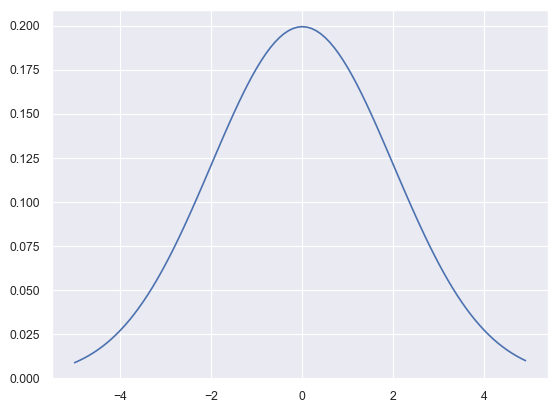

In [164]:
n = TD.Normal(0, 2)
x = torch.arange(start=-5, end=5, step=0.1)
y = n.log_prob(x) 
plt.plot(x.detach().numpy(), torch.exp(y).detach().numpy())

In [165]:
import seaborn as sns
sns.set_theme("paper")

device = torch.device("mps")

import sys
sys.path.append('../../homeworks')

In [166]:
from dgm_utils import train_model
from dgm_utils import plot_training_curves
from dgm_utils import visualize_2d_data, visualize_2d_samples
from dgm_utils import show_samples, visualize_images, load_dataset

## Task 2: VAE on 2d data (4pt)

In this task we will implement simple VAE model for 2d gaussian distribution $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$.

We will consider two cases: 
* 2d univariate distribution (diagonal covariance matrix $\boldsymbol{\Sigma}$);
* 2d multivariate distribution (strictly non-diagonal covariance matrix $\boldsymbol{\Sigma}$).

The goal is to analyze the difference between these two cases and understand why the trained VAE models will behave differently.

Below you will find data generation function. Look carefully, do not change.

In [167]:
def generate_2d_data(count, mode='univariate'):
    assert mode in ['univariate', 'multivariate']
    np.random.seed(42)
    mean = [[2.0, 3.0]]
    sigma = [[3.0, 1.0]]
    if mode == 'univariate':
        rotate = [
            [1.0, 0.0], 
            [0.0, 1.0]
        ]
    else:
        rotate = [
            [np.sqrt(2) / 2, np.sqrt(2) / 2], 
            [-np.sqrt(2) / 2, np.sqrt(2) / 2]
        ]
    
    data = mean + (np.random.randn(count, 2) * sigma).dot(rotate)
    data = data.astype('float32')
    split = int(0.7 * count)
    train_data, test_data = data[:split], data[split:]
    return train_data, test_data

Let generate the data and visualize it. We will generate data for two cases.

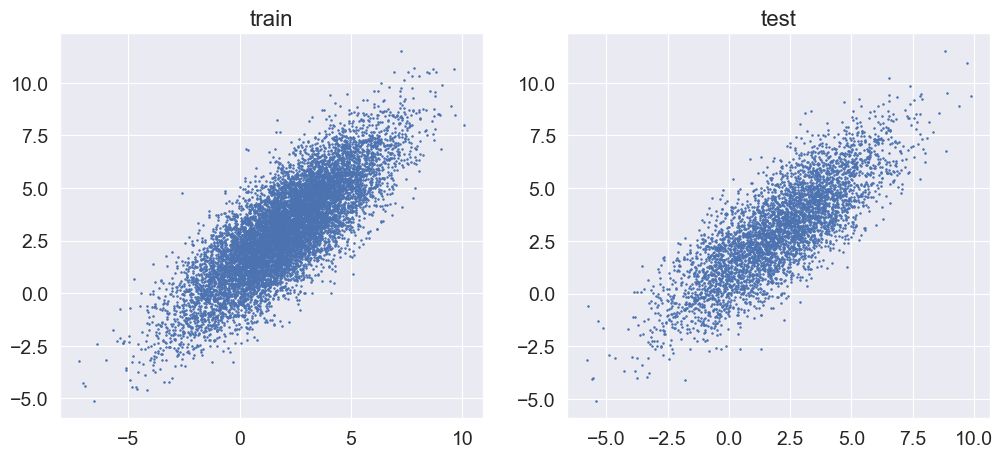

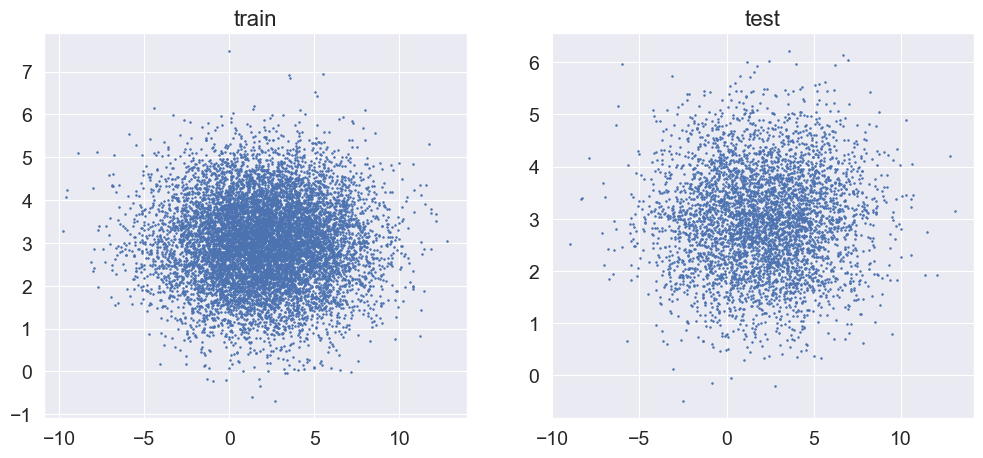

In [168]:
COUNT = 15000

train_data, test_data = generate_2d_data(COUNT, mode='multivariate')
visualize_2d_data(train_data, test_data)

train_data, test_data = generate_2d_data(COUNT, mode='univariate')
visualize_2d_data(train_data, test_data)

The difference of these two cases is the form of covariance matrix $\boldsymbol{\Sigma}$.

In multivariate case the matrix is non-diagonal, in univariate case it is strictly diagonal. As you will see, our VAE model will have absolutely different results for these datasets.

Now it is time to define our model. Our model will have the following structure:

* The latent dimensionality is equal to 2, the same as the data dimensionality ($\mathbf{z} \in \mathbb{R}^2$, $\mathbf{x} \in \mathbb{R}^2$).
* Prior distribution is standard Normal ($p(\mathbf{z}) = \mathcal{N}(0, I)$).
* Variational posterior distribution (or encoder) is $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$. Here $\boldsymbol{\phi}$ denotes all parameters of the encoder neural network. 
* Generative distribution (or decoder) is $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$. Here $\boldsymbol{\theta}$ denotes all parameters of the decoder neural network. Please note, that here we will use continuous distribution for our variables $\mathbf{x}$.
* We will consider only diagonal covariance matrices $\boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x})$, $\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z})$.

Model objective is ELBO:
$$
    \mathcal{L}(\boldsymbol{\phi}, \boldsymbol{\theta}) = \mathbb{E}_{q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) - KL (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) || p(\mathbf{z})).
$$

To make the expectation is independent of parameters $\boldsymbol{\phi}$, we will use reparametrization trick.

To calculate the loss, we should derive
- $\log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$, note that generative distribution is $\mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$.
- KL between $\mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$ and $\mathcal{N}(0, I)$.

Let start with the helper functions.

In [169]:
def get_normal_KL(mean_1, log_std_1, mean_2=None, log_std_2=None):
    """
        This function should return the value of KL(p1 || p2),
        where p1 = Normal(mean_1, exp(log_std_1)), p2 = Normal(mean_2, exp(log_std_2) ** 2).
        If mean_2 and log_std_2 are None values, we will use standard normal distribution.
        Note that we consider the case of diagonal covariance matrix.
    """
    if mean_2 is None:
        mean_2 = torch.zeros_like(mean_1)
    if log_std_2 is None:
        log_std_2 = torch.zeros_like(log_std_1)
        
    # ====
    # your code
    return (log_std_2 - log_std_1 +
            (torch.exp(2*log_std_1) + (mean_1 - mean_2) ** 2) / (2 * torch.exp(2*log_std_2)) - 0.5
           )
    
    # ====
    
def test_KL():
    assert np.isclose(get_normal_KL(torch.tensor(2), torch.tensor(3), torch.tensor(0), torch.tensor(0)).numpy(), 200.2144, rtol=1e-3)
    assert np.isclose(get_normal_KL(torch.tensor(2), torch.tensor(3), torch.tensor(4), torch.tensor(5)).numpy(), 1.50925, rtol=1e-3)
    assert np.allclose(get_normal_KL(torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))).numpy(), [49.2990, 1498.479], rtol=1e-3)


test_KL()

In [170]:
def get_normal_nll(x, mean, log_std):
    """
        This function should return the negative log likelihood log p(x),
        where p(x) = Normal(x | mean, exp(log_std) ** 2).
        Note that we consider the case of diagonal covariance matrix.
    """
    # ====
    # your code

    nll = -TD.Normal(mean, torch.exp(log_std)).log_prob(x)
    
    return nll
    
    if len(x.shape) > 0:
        n = x.shape[-1]
    else:
        ll = -0.5*np.log(2*np.pi) - log_std - 0.5*((mean - x)/torch.exp(log_std))**2
        print(-ll)
        return -ll
    
    ll = - 0.5*n*np.log(2*np.pi) - torch.sum(log_std) - 0.5*(mean - x)**2 / (torch.exp(log_std)**2)
    
    print(-ll)
    return -ll
    # ====

In [171]:
def test_NLL():
    assert np.isclose(get_normal_nll(torch.tensor(2), torch.tensor(2), torch.tensor(3)).numpy(), 3.9189, rtol=1e-3)
    assert np.isclose(get_normal_nll(torch.tensor(5), torch.tensor(-3), torch.tensor(6)).numpy(), 6.9191, rtol=1e-3)
    assert np.allclose(get_normal_nll(torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))).numpy(), np.array([3.9982, 5.9197]), rtol=1e-3)
    pass

test_NLL()

We will use simple fully connected dense networks for encoder and decoder.

In [172]:
class FullyConnectedMLP(nn.Module):
    def __init__(self, input_shape, hiddens, output_shape, device=device):
        assert isinstance(hiddens, list)
        super().__init__()
        self.input_shape = (input_shape,)
        self.output_shape = (output_shape,)
        self.hiddens = hiddens
        self.device = device

        net = []

        # ====
        # your code 
        # stack Dense layers with ReLU activation
        # note: you do not have to add relu after the last dense layer
        d_in = input_shape
        for l, d_out in enumerate(hiddens + [output_shape]):
            net.append(nn.Linear(d_in, d_out, bias=True, device=None, dtype=None))
            if l < len(hiddens):
                net.append(torch.nn.ReLU())
            d_in = d_out    
        # ====
        self.net = nn.Sequential(*net)

    def forward(self, x):
        # ====
        # your code
        # apply network that was defined in __init__ and return the output
        return self.net(x.to(self.device))
        # ====

Now it is time to implement the VAE model.

In [173]:
device = torch.device("mps")
#device = torch.device("cpu")

In [174]:
class VAE2d(nn.Module):
    def __init__(self, n_in, n_latent, enc_hidden_sizes, dec_hidden_sizes, beta=1, device=device):
        assert isinstance(enc_hidden_sizes, list)
        assert isinstance(dec_hidden_sizes, list)
        super().__init__()
        self.n_latent = n_latent
        self.device = device
        self.beta = beta
        # ====
        # your code
        # define encoder and decoder networks
        # the encoder takes n_in elements, has enc_hidden_sizes neurons in hidden layers 
        # and outputs 2 * n_latent (n_latent for means, and n_latent for std)
        # the decoder takes n_latent elements, has dec_hidden_sizes neurons in hidden layers 
        # and outputs 2 * n_in (n_in for means, and n_in for std)
        self.encoder = FullyConnectedMLP(n_in, enc_hidden_sizes, 2*n_latent)
        self.decoder = FullyConnectedMLP(n_latent, dec_hidden_sizes, 2*n_in)
        # ====

    def prior(self, n):
        # ====
        # your code
        # return n samples from prior distribution (we use standard normal for prior)
        d = TD.Normal(0, 1)
        return d.sample(torch.tensor((n, 2)))
        # ====

    def forward(self, x):
        # ====
        # your code
        # now you have to return from the model 
        # - mu_z - means for variational distribution 
        # - mu_x - means for generative distribution
        # - log_std_z - logarithm of std for variational distribution
        # - log_std_x - logarithm of std for generative distribution
        # we use logarithm, since the std is always positive
        # to get std we will exponentiate it to get rid of this constraint

        # 1) mu_z, log_std_z are outputs from the encoder
        # 2) apply reparametrization trick to get z (input of decoder)
        # (do not forget to use self.prior())
        # 3) mu_x, log_std_x are outputs from the decoder
        #    Note: [mu, log_std = decoder(input).chunk(2, dim=1)]

        mu_z, log_std_z = self.encoder(x).chunk(2, dim=1)
        
        # reparameterization trick
        eps = self.prior(x.shape[0]).to(self.device)
        z = mu_z + eps*(torch.exp(log_std_z))
        
        mu_x, log_std_x = self.decoder(z).chunk(2, dim=1)
        
        # ====
        return mu_z, log_std_z, mu_x, log_std_x

    def loss(self, x):
        mu_z, log_std_z, mu_x, log_std_x = self(x)
        # ====
        # your code
        # 1) apply model to get mu_z, log_std_z, mu_x, log_std_x
        # 2) compute reconstruction loss using get_normal_nll (it is the first term in ELBO)
        # 3) compute KL loss using get_normal_KL (it is the second term in ELBO)
        
        recon_loss = (get_normal_nll(x, mu_x, log_std_x)).mean(dim=-1)
        
        recon_loss = torch.mean(recon_loss)
        
        kl_loss = torch.mean(get_normal_KL(mu_z, log_std_z))
        # ====

        return {
            'elbo_loss': recon_loss + self.beta*kl_loss, 
            'recon_loss': recon_loss,
            'kl_loss': kl_loss
        }

    def sample(self, n, sample_from_decoder=True):
        with torch.no_grad():
            # ====
            # your code
            # to sample from VAE model you have to sample from prior
            # and then apply decoder to prior samples.
            # parameter noise indicates whether to sample from decoder
            # or just use means of generative distribution as samples
            # 1) generate prior samples
            # 2) apply decoder
            # 3) sample from the decoder distribution if sample_from_decoder=True
            z = self.prior(n)
            
            if sample_from_decoder:
                mu_x, log_std_x = self.decoder(z).chunk(2, dim=1)
                z = TD.Normal(mu_x, torch.exp(log_std_x)).sample()
            # ====
        return z.cpu().numpy()

We will use the following function for training our models. Look carefully, do not change.

In [175]:
def solve_task(train_data, test_data, model, batch_size, epochs, lr, use_cuda=False, 
               device=device,
               use_tqdm=False):
    train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE)
    train_losses, test_losses = train_model(
        model, train_loader, test_loader, epochs=EPOCHS, lr=LR,
        use_cuda=use_cuda, device=device, use_tqdm=use_tqdm, loss_key='elbo_loss'
    )
    samples_noise = model.sample(3000, sample_from_decoder=True)
    samples_nonoise = model.sample(3000, sample_from_decoder=False)

    for key, value in test_losses.items():
        print('{}: {:.4f}'.format(key, value[-1]))

    plot_training_curves(train_losses, test_losses)
    visualize_2d_samples(samples_noise, title='Samples with Decoder Noise')
    visualize_2d_samples(samples_nonoise, title='Samples without Decoder Noise')

In [176]:
# ====
# your code
# choose these parameters (2 hidden layers could be enough for encoder and decoder)
n = 16

ENC_HIDDEN_SIZES = [n, n]
DEC_HIDDEN_SIZES = [n, n]
BATCH_SIZE = 64 # any adequate value
EPOCHS = 5   # < 10
LR = 0.01         # < 1e-2
# ====

beta = 1

COUNT = 10000

Firstly, we will train the VAE model for multivariate gaussian distribution.

In [177]:
model = VAE2d(2, 2, ENC_HIDDEN_SIZES, DEC_HIDDEN_SIZES, beta=beta)
print(model)

VAE2d(
  (encoder): FullyConnectedMLP(
    (net): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=16, bias=True)
      (3): ReLU()
      (4): Linear(in_features=16, out_features=4, bias=True)
    )
  )
  (decoder): FullyConnectedMLP(
    (net): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=16, bias=True)
      (3): ReLU()
      (4): Linear(in_features=16, out_features=4, bias=True)
    )
  )
)


In [178]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.6816,  0.4840],
         [-0.0706, -0.4779],
         [ 0.6250,  0.4637],
         [-0.4249, -0.6648],
         [-0.4576, -0.6537],
         [ 0.0308, -0.2918],
         [-0.5201,  0.5009],
         [-0.5213, -0.2157],
         [-0.3566,  0.1840],
         [ 0.2175,  0.4744],
         [-0.5948, -0.6241],
         [ 0.1057,  0.6924],
         [-0.4401,  0.0575],
         [-0.3162, -0.4695],
         [-0.5384, -0.7044],
         [-0.4247, -0.1901]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2693, -0.2020, -0.1814,  0.5118,  0.0922, -0.6345,  0.1615, -0.1545,
          0.5962, -0.4147, -0.2971,  0.5320,  0.4919,  0.3947, -0.2290, -0.5172],
        requires_grad=True),
 Parameter containing:
 tensor([[-2.4448e-01,  9.0451e-02, -1.0921e-01,  1.4824e-01, -2.0120e-01,
          -1.8248e-01, -9.0616e-02, -1.9509e-01, -6.4226e-02, -2.0414e-02,
           2.0278e-01,  8.5989e-02, -6.1821e-02,  2.2714e-01,  1.2237e-01,
          -8.6870e-02],
    

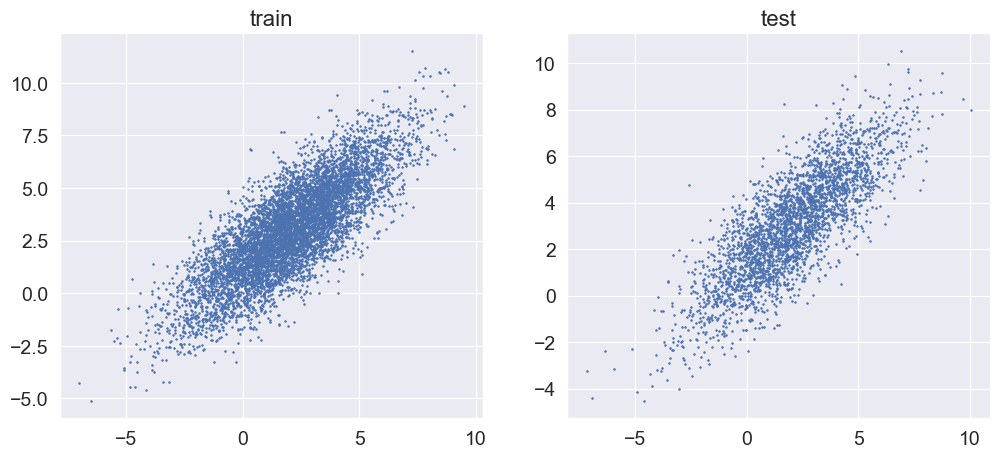

elbo_loss: 2.1006
recon_loss: 1.6526
kl_loss: 0.4480


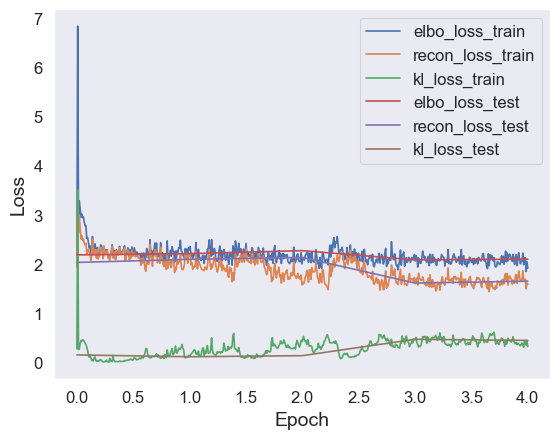

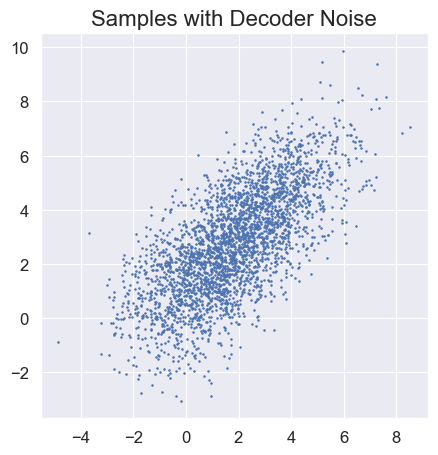

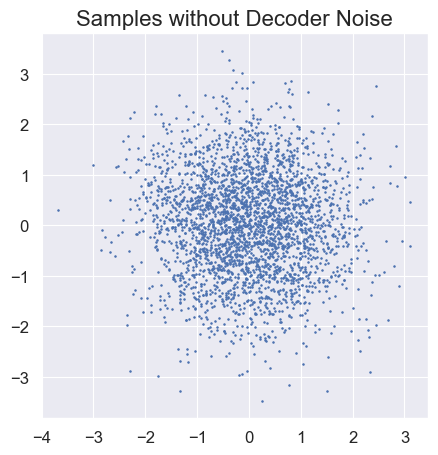

In [134]:
n = 16

ENC_HIDDEN_SIZES = [n, n]
DEC_HIDDEN_SIZES = [n, n]
BATCH_SIZE = 64 # any adequate value
EPOCHS = 5   # < 10
LR = 0.1         # < 1e-2
# ====

beta = 1

COUNT = 10000

train_data, test_data = generate_2d_data(COUNT, mode='multivariate')
visualize_2d_data(train_data, test_data)

solve_task(train_data, test_data, model, BATCH_SIZE, EPOCHS, LR, use_cuda=False, device=device)

To analyze our models we will use the following function. Look carefully, do not change.

This function calculates the mean $\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x})$, and covariances $\boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x})$ of the variational posterior distribution $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})$.

In [136]:
def get_latent_stats(model, test_data, use_cuda=False, batch_size=3000):
    batch = next(iter(data.DataLoader(test_data, batch_size=batch_size, shuffle=True)))
    if use_cuda:
        batch = batch.cuda()

    with torch.no_grad():
        mu_z, log_std_z = model(batch)[:2]
        
    mu_z = mu_z.cpu().numpy()
    std_z = log_std_z.exp().cpu().numpy()

    return mu_z, std_z

In [137]:
# just look at these numbers and read the comments after this task
mu_z, std_z = get_latent_stats(model, test_data)

print('mu_z = ', mu_z.mean(axis=0), '+-', mu_z.std(axis=0))
print('std_z = ', std_z.mean(axis=0), '+-', std_z.std(axis=0))

mu_z =  [0.02227866 0.02330956] +- [0.907588  0.0139574]
std_z =  [0.40827754 1.0523771 ] +- [0.01978947 0.01657092]


Secondly, we will train the VAE model for univariate gaussian distribution.

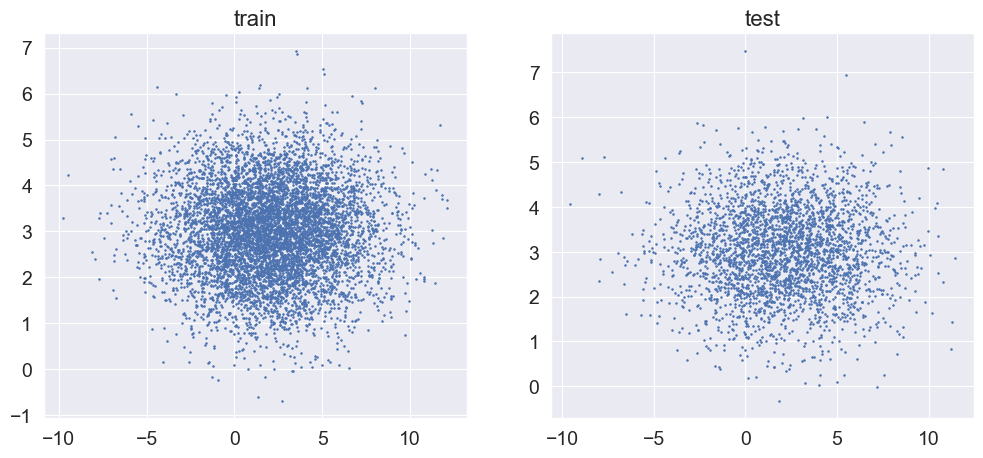

elbo_loss: 1.9740
recon_loss: 1.9740
kl_loss: -0.0000


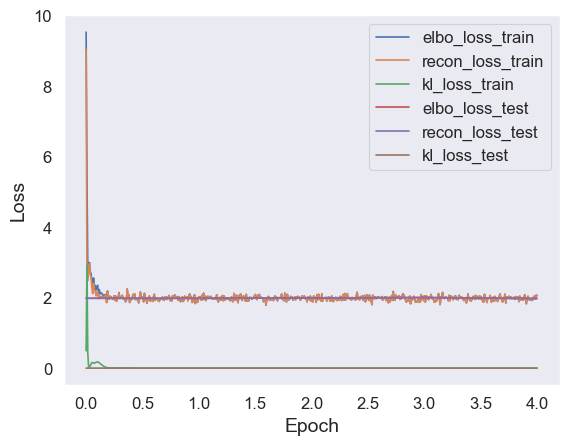

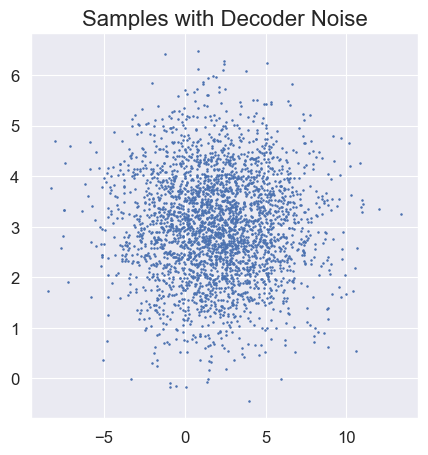

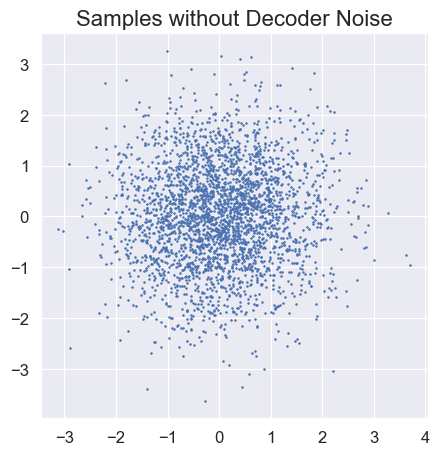

In [138]:
train_data, test_data = generate_2d_data(COUNT, mode='univariate')
visualize_2d_data(train_data, test_data)

model = VAE2d(2, 2, ENC_HIDDEN_SIZES, DEC_HIDDEN_SIZES).to(device)
solve_task(train_data, test_data, model, BATCH_SIZE, EPOCHS, LR, use_cuda=USE_CUDA)

In [139]:
# just look at these numbers and read comments after this task
mu_z, std_z = get_latent_stats(model, test_data)

print('mu_z = ', mu_z.mean(axis=0), '+-', mu_z.std(axis=0))
print('std_z = ', std_z.mean(axis=0), '+-', std_z.std(axis=0))

mu_z =  [ 1.5500176e-04 -3.4421711e-05] +- [1.2077925e-09 2.3646862e-10]
std_z =  [1.0000039  0.99997914] +- [1.1801461e-05 3.8206534e-05]


After training the VAE model on these 2 datasets, have a look at "Samples without Decoder Noise" figures. These figures show the means $\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z})$ of the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$. In the case of multivariate gaussian, the means are perfectly aligned with the data distribution. 
Otherwise, you have to see the strange figure in the univariate gaussian case . This happens due to so called **posterior collapse** (we will discuss it at the one of our lectures).

To be brief, the reason is the following. Our posterior distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$ is a univariate (covariance matrix is diagonal). Thus, the model does not need latent variable since the data distribution is also univariate. In this case VAE ignores latent variable, cause the model fits the distribution without any information from latent space.

If the decoder ignores latent variable, the second term in ELBO (KL) could be low (variational posterior distribution, which is given by encoder model, is close to prior distribution for each datapoint). In the training curves you have to see that KL loss behaves differently in these two cases.

The mean and std of variational posterior distribution also proves this concept. For the second case you have to see that mean is almost zero and std is almost one.

It is a real problem for generative models and we will discuss later how to overcome it.

## Task 3: VAE on CIFAR10 data (4pt)

In this task you will implement VAE model for CIFAR10 dataset. 

Files already downloaded and verified
Files already downloaded and verified


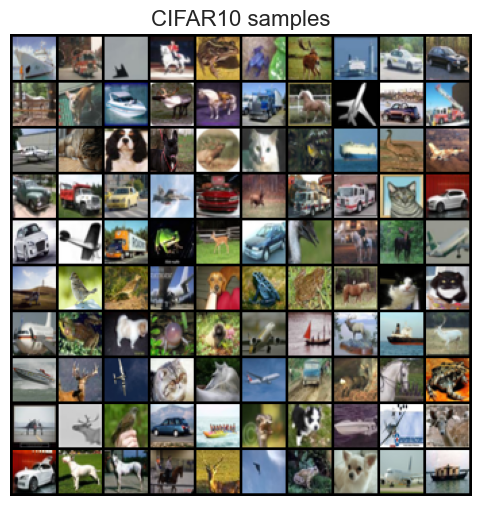

In [8]:
train_data, test_data = load_dataset('cifar10', flatten=False, binarize=False)
visualize_images(train_data, 'CIFAR10 samples')

In [9]:
train_data.shape

(50000, 3, 32, 32)

you can use this formula: $[(W−K+2P)/S]+1$


- $W$ is the input side
- $K$ is the Kernel size
- $P$ is the padding
- $S$ is the stride

transposed convolution:

$(W - 1)*S - 2*P + (K -1) + 1$

In [224]:
3*32**2

3072

In [227]:
w = 32
k = 4
p = 1

for s in [2, 2, 2, 2]:
    w = (w - k + 2*p)/s + 1
    print(int(w))
int(w), 256*int(w)**2

16
8
4
2


(2, 1024)

In [334]:
w = 4
k = 4
p = 1
s = 2

for s in [2,2,2,2]:
    w = (w - 1)*s -2*p + (k -1 ) + 1
    print(int(w))
int(w)

8
16
32
64


64

Here the model specification will be almost the same (as in Task 2) with the following differences:
* Now our encoder and decoder will be convolutional.
* We do not fit the covariance matrix $\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z})$ in the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$. We assume that it is identical ($\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}) = \mathbf{I}$). We will use the $\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z})$ means of the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$ as model samples.
* Model objective is slightly modified ELBO:
$$
    \mathcal{L}(\boldsymbol{\phi}, \boldsymbol{\theta}) = \mathbb{E}_{q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) - \beta * KL (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) || p(\mathbf{z})).
$$
Here we introduce the parameter $\beta$. It reweights KL term in the total loss. We will discuss the choice of this parameter later in the course. In this exercise you have to play with it, starting with the value $\beta = 1$ (standard ELBO).

Let define our convolutional encoder and decoder.

In [10]:
def kl_divergence_loss(mean, log_std):
    return ((mean**2 + (log_std**2).exp() - 1 - log_std**2) / 2).mean()

In [134]:
class ConvEncoder(nn.Module):
    def __init__(self, input_shape, n_latent, device=device):
        super().__init__()
        self.input_shape = input_shape
        self.n_latent = n_latent
        self.device = device
        
        # ====
        # your code
        # we suggest to use the following architecture
        # conv2d(32) -> relu -> conv(64) -> relu -> conv(128) -> relu -> conv(256) -> fc(2 * n_latent)
        # but we encourage you to create your own architecture

        self.encoder = nn.Sequential(
            self._conv(3, 32),
            self._conv(32, 64),
            self._conv(64, 128),
            self._conv(128, 256),
            nn.Flatten()
        )    
        
        self.mu = nn.Linear(1024, n_latent)
        self.sigma = nn.Linear(1024, n_latent)
        # ====

    def _conv(self, filter_in, filter_out):
        return nn.Sequential(
            nn.Conv2d(
                filter_in, filter_out,
                kernel_size=4, stride=2, padding=1,
            ),
            nn.BatchNorm2d(filter_out),
            nn.ReLU()
        )
    
    def forward(self, x):
        # ====
        # your code
        # 1) apply convs
        # 2) reshape the output to 2d matrix for last fc layer
        # 3) apply fc layer
        
        encoder_output = self.encoder(x)
        mu = self.mu(encoder_output)
        log_std = self.sigma(encoder_output)
        
        #log_std = self.encoder(x).chunk(2, dim=1)  #.to(self.device)
        #            nn.Linear(1024, 2*n_latent)
        # ====
        return mu, log_std
        

class ConvDecoder(nn.Module):
    def __init__(self, n_latent, output_shape):
        super().__init__()
        self.n_latent = n_latent
        self.output_shape = output_shape

        #self.base_size = (128, output_shape[1] // 8, output_shape[2] // 8)
        self.base_size = (256, output_shape[1] // 16, output_shape[2] // 16)
        
        # ====
        # your code
        # we suggest to use the following architecture
        # fc -> conv2dtranspose(128) -> relu -> conv2dtranspose(64) -> relu 
        # -> conv2dtranspose(32) -> relu -> conv2dtranspose(3)
        # but we encourage you to create your own architecture
        volume = np.prod(self.base_size)
        self.decoder = nn.Sequential(
            nn.Linear(self.n_latent, volume),
            nn.Unflatten(1, self.base_size),
            self._deconv(self.base_size[0], 128),
            self._deconv(128, 64),
            self._deconv(64, 32),
            self._deconv(32, 3), #[:1],
            nn.Tanh()
        )  
        # ====
        
    def _deconv(self, filter_in, filter_out):
        return nn.Sequential(
            nn.ConvTranspose2d(
                filter_in, filter_out,
                kernel_size=4, stride=2, padding=1,
            ),
            nn.BatchNorm2d(filter_out),
            nn.ReLU()
        )
    
    def forward(self, z):
        # ====
        # your code
        # 1) apply fc layer
        # 2) reshape the output to 4d tensor 
        # 3) apply conv layers
        out = self.decoder(z)
        # ====
        return out

Now it is time to implement VAE model for image dataset.

In [158]:
class ConvVAE(nn.Module):
    def __init__(self, input_shape, n_latent, beta, device=device):
        super().__init__()
        assert len(input_shape) == 3

        self.device = device
        
        self.input_shape = input_shape
        self.n_latent = n_latent
        self.beta = beta
        # ====
        # your code
        # define encoder with input size input_shape and output dim n_latent
        # define decoder with input dim n_latent and output size input_shape
        self.encoder = ConvEncoder(input_shape, n_latent)
        self.decoder = ConvDecoder(n_latent, output_shape=input_shape)
        # ====

    def prior(self, n, use_cuda=False):
        # ====
        # your code
        # return n samples from prior distribution (we use standart normal for prior)
        d = TD.Normal(0, 1)
        z = d.sample(torch.tensor((n, self.n_latent)))
        # ====
        #if use_cuda:
        #    z = z.cuda()
        z = z.to(self.device)   
        return z

    def forward(self, x):
        # ====
        # your code
        # 1) apply encoder to get mu_z, log_std_z
        # 2) apply reparametrization trick (use self.prior)
        # 3) apply decoder to get mu_x (which corresponds to reconstructed x)
        mu_z, log_std_z = self.encoder(x)
        
        eps = self.prior(x.shape[0])
        z = mu_z + eps*(torch.exp(log_std_z))
        x_recon = self.decoder(z)
        # ====
        return mu_z, log_std_z, x_recon
        
    def loss(self, x):
        # ====
        # your code
        # 1) make forward step to get mu_z, log_std_z, x_recon
        # 2) calculate recon_loss (use get_normal_nll)
        # 3) calcucalte kl_loss (use get_normal_KL)
        batch_size = x.shape[0]
        
        mu_z, log_std_z, x_recon = self(x)
        
        x_flatten = torch.flatten(x, start_dim=1)
        x_recon_flatten = torch.flatten(x_recon, start_dim=1)
        
        recon_loss = get_normal_nll(x_flatten,
                                    x_recon_flatten,
                                    torch.zeros(x_flatten.shape).to(self.device)).sum()
        
        kl_loss_0 = get_normal_KL(mu_z, log_std_z).sum()

        z_sigma = torch.exp(log_std_z)
        kl_loss = (z_sigma ** 2 + mu_z ** 2 - log_std_z - 0.5).sum()
        
        recon_loss = recon_loss/batch_size - 2800
        kl_loss = kl_loss/batch_size
        
        print(recon_loss.cpu().detach().numpy(), kl_loss.cpu().detach().numpy())
        
        # ==== 
        return {
            'elbo_loss': recon_loss + self.beta * kl_loss, 
            'recon_loss': recon_loss,
            'kl_loss': kl_loss
        }

    def sample(self, n):
        with torch.no_grad():
            # ====
            # your code
            # 1) generate prior samples
            # 2) apply decoder
            z = self.prior(n)
            x_recon = self.decoder(z)                   
            # ====
            samples = torch.clamp(x_recon, -1, 1)
        return samples.cpu().numpy() * 0.5 + 0.5

In [159]:
# ====
# your code
# choose these parameters

BATCH_SIZE = 32  # any adequate value
EPOCHS = 12    # < 16
LR = 0.01         # < 1e-3
N_LATENS = 800   # 128 < _ < 1024
BETA = 0.5       # 0.1 < _ < 10

model = ConvVAE((3, 32, 32), N_LATENS, BETA)

In [160]:
print(model)

ConvVAE(
  (encoder): ConvEncoder(
    (encoder): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (1): Sequential(
        (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (2): Sequential(
        (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (3): Sequential(
        (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (4): Flatten(start_dim=1, end_dim=-1

  0%|                                                    | 0/12 [00:00<?, ?it/s]

746.5764 877.2645
636.7156 22586.146
545.0996 5166.9985
508.21533 3002.972
556.9927 3597.8066
460.3955 2158.3416
522.3474 1755.0311
487.5122 2360.0742
524.9375 2225.2266
459.83154 1789.1068
420.13867 1937.6853
429.08154 1566.3245
447.10254 1560.0703
449.75024 1627.3213
473.67725 1514.3779
431.23486 1368.6641
391.88672 1315.2632
435.5818 1063.6301
376.5923 1096.3103
454.52197 976.6939
474.5398 814.957
441.9165 1049.6328
427.6006 714.80347
407.32275 801.9156
402.85474 665.0955
419.85986 642.95026
475.1748 726.99304
396.8208 760.338
445.59717 732.3479
398.93506 607.3109
438.87866 650.3331
433.21777 571.2047
414.00684 496.97635
434.18726 561.18207
400.8225 498.6325
419.11157 489.5808
458.9414 472.90607
424.63135 446.7705
444.8457 430.09628
470.38574 421.74805
400.03687 426.9064
474.8921 427.25793
474.73315 426.1206
384.87134 407.72568
371.07324 408.1796
378.0161 420.98297
414.29175 373.28656
451.7124 535.60504
395.68164 382.6526
426.91895 424.14627
368.594 414.44434
449.77295 421.04556
403

351.28906 303.16046
357.00586 301.89407
379.86182 288.92767
341.1328 299.89078
419.6704 297.3404
374.3203 301.50525
390.86865 302.75006
402.9077 313.76904
459.69238 296.00388
355.69482 298.49567
305.77783 299.6244
370.97656 313.7609
374.18262 328.42075
331.4358 308.47784
377.78906 332.86786
416.64868 302.52432
326.8457 316.5174
380.89282 310.46042
378.6582 303.174
348.3589 298.31036
381.06445 310.9643
385.9917 294.3537
330.20703 298.98346
391.20947 318.2957
413.4231 297.86407
346.97607 292.75638
363.198 296.67776
389.22705 303.51587
371.37305 297.29315
378.5061 300.30292
336.06738 307.15436
345.64258 298.20038
332.61963 296.1595
315.3994 316.42767
389.18164 302.92453
334.56055 291.98492
357.4702 327.10162
335.66113 296.6831
420.93604 304.8385
353.4087 312.75302
373.77002 290.43414
406.66113 310.6369
381.36816 311.62744
389.80884 320.92773
295.063 299.47556
369.17773 292.9532
372.7251 290.44745
369.7522 297.94916
340.43774 327.06122
331.25488 313.4831
344.94922 308.89594
344.76123 293.9

335.8462 294.6907
362.11035 290.62848
369.0144 294.06345
412.63086 294.59973
372.63867 286.5155
427.95557 296.01358
349.37256 310.2769
354.0327 298.60657
294.34082 307.3497
364.42212 290.12527
384.7964 299.06927
325.36816 304.4934
383.87817 298.56055
316.0598 291.24667
329.76123 290.02243
427.76855 292.5475
353.3579 290.54224
403.55713 300.02664
370.94775 296.29553
352.16113 296.4719
370.3213 310.45758
340.65405 291.03787
330.32397 301.1509
333.52295 300.40887
343.271 297.6071
344.0232 293.48505
337.4214 288.6511
409.104 293.37427
321.33643 302.08395
345.0647 290.37317
394.22803 292.6618
362.7461 292.5948
357.24243 297.70996
338.82642 292.85742
349.7046 301.12134
335.95264 293.91852
331.24048 303.9796
355.9287 297.09067
388.42334 301.91418
341.70654 298.72665
360.3999 292.63153
370.83154 298.8566
318.34326 299.87024
401.68555 286.16486
389.50708 301.52924
343.77246 308.4649
392.35498 291.10138
361.68652 291.80106
403.90186 289.0433
343.2002 290.42798
392.06055 286.75812
332.88745 301.5

331.51147 297.38455
402.41064 291.73767
361.47656 286.7637
325.08643 288.83884
346.0244 299.2331
354.39062 297.16965
388.0547 292.47797
330.41162 292.17676
327.66797 287.83685
388.65967 300.3817
350.14453 293.03632
318.9746 297.83362
349.7483 294.16553
317.31836 291.34
328.6333 300.5915
370.9126 301.428
377.78516 296.92105
355.42725 313.57745
357.2932 289.56964
303.69873 305.44952
377.93042 289.6386
347.0193 294.58627
335.1338 304.57385
331.71924 305.685
367.03687 299.10773
335.84155 312.08203
328.01538 305.04883
361.86426 297.32693
360.23047 296.52182
329.6023 290.70038
329.77783 297.38538
340.56665 304.48907
370.2124 292.50867
347.77344 297.4247
313.27246 294.4796
354.87354 289.06564
346.91113 291.64395
380.28076 291.37924
349.4834 303.88788
403.6162 297.62848
295.31274 287.85352
278.41626 293.1033
329.62402 298.26685
384.3452 296.0202
341.8462 294.0614
364.7871 294.51135
338.14233 286.25925
397.64014 292.12753
328.1023 296.4737
428.9851 291.13275
351.80518 299.06714
330.01172 303.90

329.0537 295.4922
358.30762 300.78656
355.67383 293.53464
339.68896 296.19812
307.04565 293.40067
300.62695 296.69745
332.56006 294.9234
342.83423 301.96848
344.45728 302.94684
338.2732 301.0998
332.95093 295.143
346.93604 296.52155
367.22363 298.97748
318.67627 294.2796
364.86133 296.14294
301.33667 293.3055
311.8955 299.18555
330.1255 296.4699
382.58887 297.05066
350.43896 294.2221
283.44507 299.14276
324.33252 298.0692
366.03735 302.04453
362.14648 298.55118
346.40918 293.87946
334.67407 299.47144
365.03613 296.67807
364.55322 293.72415
304.28857 292.5302
434.00342 299.53613
401.79004 297.59973
309.16016 294.71185
343.07422 298.97607
370.97998 298.10583
314.96533 296.79413
336.89453 299.0625
378.57617 295.8769
370.58472 291.95688
341.16235 300.1344
312.8452 296.29187
373.08936 296.79962
397.73926 296.79163
292.88086 288.3563
360.22314 292.2547
345.43726 294.40643
346.30884 303.5543
310.38306 299.66812
356.18652 295.76263
305.86353 294.68063
314.79688 297.909
341.3208 302.07306
335.3

  8%|███▋                                        | 1/12 [01:03<11:37, 63.39s/it]

373.46167 297.67755
386.0625 293.60666
347.6577 301.29922
327.2556 297.24017
347.00488 296.6997
320.61475 299.1886
354.33545 304.30768
341.2578 296.73956
374.81445 298.48853
350.86865 294.41125
433.36792 300.0412
363.42603 298.68823
390.51562 301.35553
336.50513 295.70117
334.2959 297.5222
312.41333 294.75113
350.3042 291.43457
367.30127 299.6358
315.15894 294.4978
354.75195 292.5661
317.8037 298.55518
352.81323 289.99335
324.0227 297.88885
377.35205 290.30588
371.13086 299.59058
392.7776 289.64948
354.73047 290.9353
335.17822 300.7074
393.98608 300.6513
369.97217 292.0682
321.76367 302.5375
399.89087 302.74255
306.2063 293.4453
322.7207 306.92548
317.8579 292.4405
306.5332 290.6763
325.41626 296.3568
315.1482 307.83353
340.10938 299.18088
385.6255 302.69357
357.85474 291.51678
335.5122 300.81787
335.33154 307.3596
318.04712 298.35083
349.8025 304.43146
365.03516 296.1679
391.18457 290.3774
325.59375 291.39984
314.12085 289.17746
333.49048 301.26578
381.04004 298.16745
380.0835 298.593

336.12842 313.04053
377.25977 297.53033
328.56982 289.83972
300.6372 297.74698
282.72314 297.6475
310.3745 310.0591
367.812 296.9513
352.021 296.97845
377.72876 296.46756
302.5786 290.584
341.69238 293.30075
375.12378 299.23694
352.4817 287.0539
317.01807 295.06555
334.78125 293.01547
372.05933 296.25446
352.84033 295.34854
351.01978 296.52737
353.61157 303.9984
345.4851 299.05408
325.42358 301.13672
331.45654 301.35577
338.63086 294.92526
341.3291 300.88702
370.6006 301.2577
353.49365 293.88113
328.19165 293.30658
337.7964 294.17297
361.70752 294.62
299.3186 300.64014
328.36523 296.85388
270.4248 297.34167
322.6067 299.92682
355.8579 299.21896
291.53955 291.49622
326.8142 300.5749
276.36768 290.03333
327.958 294.53253
380.7661 299.3406
358.6692 295.8723
308.7119 293.86664
353.40552 295.6026
357.56152 292.85834
338.7627 302.7519
390.75146 298.3412
344.8318 304.05328
343.87695 298.46198
330.23584 297.09766
314.50293 297.8983
283.98682 291.02454
358.95825 299.72577
395.87354 297.47083
34

304.677 295.5205
343.80176 306.0894
371.66333 302.647
339.5144 297.53372
328.0542 292.95953
327.37646 300.75208
401.9441 299.96756
400.18286 301.8949
363.19482 295.2615
309.59717 291.18478
308.52783 294.09625
375.49707 292.92352
372.46826 303.51505
353.43115 292.98053
373.6787 291.48694
322.38306 296.93866
335.04004 294.16122
376.10962 304.71246
323.2146 304.35428
337.70068 306.25623
348.39355 291.6706
358.3672 295.30826
359.2146 296.96368
348.50488 296.97253
358.46655 297.21484
333.83008 300.0404
362.73242 289.6568
348.95557 289.09323
400.00586 314.87744
331.177 290.05246
339.38916 297.90283
316.6582 292.3771
333.11182 303.34262
388.5315 299.42377
374.3916 297.57944
334.33252 298.7755
352.43555 292.31006
359.896 303.21008
363.0879 298.3189
333.37842 302.01392
350.17114 288.72424
367.3247 292.47815
318.4004 297.7401
352.83057 294.97473
312.58105 295.97473
275.2378 295.49335
336.42822 297.29315
401.23193 292.59882
338.81934 303.4163
355.04004 296.70624
296.17456 297.21893
417.2788 289.8

367.10352 298.75403
384.49365 297.0066
333.6123 299.65002
325.27808 297.79364
339.52783 294.3686
318.57764 299.8229
377.6621 296.21292
310.03564 304.80066
344.9729 298.44125
314.87524 295.81628
343.38184 299.8029
361.53564 297.01715
348.72485 297.9809
307.6953 301.23114
329.58252 295.06653
306.09985 294.92334
336.36572 296.51337
374.95215 297.82602
331.37378 297.12646
345.45435 293.65857
339.40625 292.50677
333.09912 293.35614
310.33398 292.50635
335.47754 289.2835
330.12427 293.14294
362.81787 291.43784
330.28296 295.2603
318.7124 296.2478
332.7207 295.46832
293.62378 298.9419
329.08105 293.3772
304.49292 308.56
314.99854 299.07224
319.96826 298.82623
364.2605 299.18213
333.7793 297.79456
271.5381 301.9972
329.11548 294.6247
341.7046 292.38367
376.9109 289.2994
388.23193 293.63766
381.53442 290.55206
348.47705 294.36853
337.49707 292.55057
336.28418 291.0101
345.3479 298.805
310.083 296.8654
324.3296 297.4502
349.41455 299.2554
352.95166 294.22052
368.26392 294.245
368.9331 296.26904


338.88086 298.702
341.43555 297.59686
333.54346 297.4586
326.91895 293.18958
347.6316 293.34036
364.55273 297.64264
313.93213 292.88336
362.71338 292.71747
300.66846 290.5487
310.167 296.24152
326.77783 294.8867
382.1333 294.999
348.7246 290.5545
281.7505 296.48315
322.01685 294.99838
361.46777 296.3435
357.26978 295.22418
338.84277 293.95316
323.6338 296.94916
358.03394 293.81635
355.53955 291.74426
297.6797 292.77982
428.03052 296.36945
395.82812 294.87878
305.854 293.38034
339.25586 294.38257
367.79102 294.10382
312.9309 293.4148
331.75146 298.2246
376.4082 293.29034
363.29028 291.10385
338.1931 295.43628
308.32275 294.04663
368.6897 294.23798
393.80347 295.3377
287.292 288.44745
353.64062 290.48163
339.32373 293.38348
340.3047 299.32904
307.11133 294.97794
355.08984 294.71622
299.57104 291.7011
310.63818 293.97064
335.91748 298.42664
332.34473 293.3733
379.6621 296.47437
391.32788 297.2013
327.40112 293.2751
284.1792 293.7768
318.38574 293.75345
279.09448 295.3222
357.1504 293.6128

 17%|███████▎                                    | 2/12 [02:04<10:21, 62.12s/it]

345.22607 294.26184
317.5005 296.2409
349.2202 299.1471
334.1797 294.18872
369.6106 298.50247
343.70557 296.01428
305.16382 291.10596
326.69482 299.25757
294.21777 299.65552
311.12988 291.65036
325.38525 288.61496
332.0547 290.46588
349.9541 289.64734
358.95435 296.14542
368.66943 295.3425
330.67773 292.41394
330.0703 298.80298
393.21948 296.35968
327.375 291.83795
319.37988 298.8691
373.05127 301.4651
301.45215 295.75708
338.10156 299.13943
331.44092 303.33795
371.677 302.18005
331.27954 308.68512
328.8152 293.53748
340.8943 297.05536
315.30566 294.89557
341.21167 305.65945
298.46582 293.25787
338.70166 295.60193
310.1709 296.8656
332.07666 297.51624
350.87988 299.61218
307.87354 293.0531
300.90503 293.98526
379.8728 294.60608
304.4961 295.26987
324.3777 295.40332
385.9707 297.9405
314.1206 292.75937
395.96924 295.03357
340.00342 297.20697
337.5598 299.60837
386.43066 298.36835
376.3955 296.48178
358.59546 292.73248
314.70996 294.71097
379.27148 292.47784
372.1162 302.28424
310.00415 

334.02002 297.1081
307.14185 304.16052
384.68896 292.45865
316.0415 301.01974
291.02808 299.25293
336.22388 295.53268
291.1704 295.41986
361.6433 297.51025
323.72803 295.5839
331.9873 298.27307
359.00757 297.20865
349.72144 292.8933
333.80273 291.215
304.60767 294.34598
352.49243 296.5072
298.45947 297.17517
355.8999 296.52612
321.86523 294.68115
342.55737 298.4736
341.3579 301.0769
367.74316 296.71503
339.13135 300.98666
337.7456 299.41077
355.53857 301.31015
320.2417 297.83063
311.24927 299.50214
329.71338 295.78397
379.73535 299.7259
379.14258 293.6705
359.5713 295.82004
317.3806 290.8775
328.9297 298.55768
308.3811 294.91382
308.49512 300.67865
274.44043 305.303
320.5852 298.56064
298.7959 299.46442
347.97168 299.25592
391.44385 296.94125
330.69556 296.85822
329.30273 301.6737
343.06543 300.3626
312.15137 296.14575
289.45654 304.58792
320.59497 299.5563
359.08594 294.61826
353.76758 297.48782
305.38452 304.61243
335.4702 294.30804
306.68066 295.09872
365.68433 294.67664
305.063 297

335.20776 301.1131
353.19727 300.08127
317.08057 298.58765
293.0652 296.28784
311.2871 297.49634
335.3296 295.5096
366.47632 293.98767
362.51587 297.42398
332.25244 305.8944
360.64453 305.23535
323.51025 301.55673
375.4585 294.51813
385.42407 297.29877
294.94067 296.46356
311.4048 295.086
346.46387 294.50372
323.02344 297.36676
373.76367 296.8311
347.59692 295.09802
303.3518 297.0177
313.21582 297.79425
331.8169 297.56097
331.1621 301.032
337.49854 298.75922
387.41895 296.42822
320.73828 294.38055
297.1958 300.3812
312.43262 293.19333
349.81885 308.48175
365.42725 300.47598
350.34668 296.39722
309.93848 297.534
369.46265 297.14264
283.53662 292.21518
331.0752 294.17438
328.15454 299.61456
369.66797 300.3468
299.84473 293.53473
329.41675 293.99683
301.11548 300.59564
334.2976 294.49088
353.11328 295.4587
337.3059 292.8138
330.19238 297.80264
346.99463 299.8967
328.99316 298.83813
330.64355 295.3542
331.93652 292.4453
331.15186 296.2666
319.8474 296.40683
361.19482 299.7168
359.7295 296.

373.51685 296.16187
359.29175 297.0395
383.59253 296.16678
321.18823 299.4052
299.64697 297.54443
385.58496 294.42413
360.72266 296.18878
348.69092 296.82916
345.93774 300.53693
326.1753 302.34598
342.7212 299.74738
338.80908 297.2245
289.43604 305.74838
336.66284 301.12537
338.96265 297.72406
325.13647 296.0061
315.09473 296.93604
332.1726 294.30927
396.88574 297.00104
373.56958 293.39948
358.03027 293.46875
340.11328 297.89008
321.8164 303.5823
362.95752 296.21115
333.8374 294.94278
406.8545 296.0786
318.69922 296.65912
347.75635 297.91547
353.78345 297.75204
325.98438 297.88263
392.55127 302.02237
324.22998 294.23294
311.06055 300.0384
342.281 299.0149
326.1731 296.48654
352.06006 303.99023
340.2373 296.98077
339.38135 310.8527
356.05493 295.57794
301.27148 293.3388
365.11328 294.27548
332.90332 292.85767
329.84717 292.3925
359.4431 293.67584
312.9226 297.5656
348.50024 298.0218
337.1538 299.5945
382.71167 299.13837
360.8662 299.95587
355.22217 298.3858
329.50366 297.76825
334.15796

318.771 294.77948
351.84497 297.2724
345.18237 295.02197
327.64917 296.66483
295.38184 295.15512
289.98242 296.52243
325.85278 294.81854
328.479 300.41937
330.9497 300.9558
326.79395 299.05618
318.10742 295.93115
337.48633 296.12604
355.37354 300.22012
305.27246 296.60785
355.78516 296.87646
294.24414 293.8111
300.57178 298.56354
319.03638 297.5252
374.1372 296.89117
342.625 292.31476
274.13892 299.31958
311.8357 297.9932
354.71875 297.48743
349.56934 299.3412
330.75293 297.38455
314.5769 299.01666
354.50537 295.486
350.84692 294.30148
292.2273 294.39822
417.29834 299.6507
388.4944 296.85345
301.74707 296.32547
329.34375 297.18677
358.6333 296.12988
304.146 296.27515
323.9419 300.5861
364.9751 296.39194
359.43408 293.6346
327.36572 297.8776
303.93164 297.1761
360.48242 296.71692
386.32837 298.05383
284.9724 291.3283
349.09082 293.39307
333.6416 295.67773
336.45557 301.0025
299.05176 297.86853
341.2273 297.27472
292.87646 295.17926
301.7046 298.6856
327.83105 301.69995
327.74316 295.943

 25%|███████████                                 | 3/12 [03:04<09:11, 61.28s/it]

308.32568 298.15784
339.65796 301.49103
326.2693 297.3285
360.89014 301.10788
354.08594 293.6801
344.16992 296.05426
339.0205 294.73444
337.78882 295.73016
336.32153 292.2742
320.7666 292.85727
348.10498 299.6946
326.25293 299.30975
375.6184 299.9894
316.1206 298.7544
337.35352 300.19995
317.44922 297.54028
353.67798 296.8013
352.51904 299.84076
317.11768 301.12048
375.5039 298.8098
302.55615 298.12302
360.33936 302.56317
359.45093 292.1455
326.094 298.82858
325.6245 294.07404
351.37842 291.96283
319.79565 300.26013
311.82446 294.6183
315.48413 300.28394
350.04175 297.9161
346.85742 292.69058
326.2483 298.59848
351.46582 296.77502
357.06836 298.43732
333.7693 294.5323
321.7212 298.09332
289.46826 300.86047
340.50122 298.9653
303.437 299.2993
312.28857 299.50256
311.0686 296.62656
324.125 297.9369
297.615 302.99786
337.78027 298.1469
322.04102 296.6832
338.11133 300.95074
302.66895 296.8252
343.40576 297.2652
322.62817 300.65222
327.8723 293.0286
382.33154 295.97784
352.3164 300.75607
3

335.92383 298.35828
315.6167 300.6119
354.14893 297.87146
274.96924 303.10425
297.95654 298.51245
303.3872 299.16916
361.94067 299.90436
348.80225 300.18597
357.0918 298.59253
384.10742 302.3803
353.35254 297.3059
257.67114 301.79236
353.99976 298.10388
314.49023 293.67685
370.99854 296.63898
290.52686 295.1975
333.53833 294.14343
332.29175 298.3185
361.82935 295.66705
290.66162 298.52826
361.2124 298.19916
268.91724 296.28363
301.75342 296.31592
304.42114 297.95413
298.8506 300.84088
338.72266 301.98657
337.0183 301.60837
298.91772 297.99124
373.87622 298.47656
306.50195 296.37854
310.84497 300.81653
342.10596 296.9245
310.50342 297.48233
307.24805 296.76645
352.9961 297.11945
325.59326 294.5311
303.47168 298.50452
318.51807 300.1584
341.05762 301.00977
299.00244 302.39474
408.86108 299.47748
231.84473 298.78455
288.26343 294.29126
282.08667 297.4083
325.1338 293.2494
363.5 295.4477
363.2876 295.4583
371.57568 297.6911
309.25146 297.7244
378.26807 298.69415
352.85742 298.40674
358.273

276.93115 295.04962
320.19067 298.80774
374.55127 297.90857
284.99658 297.6831
342.1189 299.1048
322.25537 296.8288
340.83936 299.33408
365.0503 299.3083
308.63135 297.62213
340.57104 299.14584
326.78076 300.94617
295.1931 298.3544
374.2107 296.947
327.27637 299.05768
323.1089 295.03766
312.31006 300.8455
354.86572 303.01712
317.3296 298.45453
330.031 296.4088
327.6548 299.97266
315.60425 297.36908
354.7644 296.2583
315.82373 297.56726
340.21753 299.9782
305.92334 302.55975
303.43457 301.8069
338.62354 299.0891
320.8452 296.55453
308.83618 294.2629
306.73828 294.57684
341.67944 295.56146
277.1355 296.3697
344.5398 294.93488
330.31934 298.20844
311.31226 297.49426
357.89648 300.5744
260.36597 302.39252
331.00928 301.73688
338.15796 295.73987
358.05127 297.3795
344.594 292.4083
316.93945 297.66373
354.39233 294.6989
364.42822 298.15417
341.30884 298.9121
303.19897 298.39166
328.11816 297.73846
313.28613 300.02277
349.63232 295.43784
337.5608 302.23022
306.39502 298.4731
360.57617 307.867

309.91992 297.13275
316.614 297.56738
326.73145 299.2119
368.70825 296.93088
350.27686 300.6392
336.72754 300.49847
288.92993 297.6352
339.37378 297.13455
294.38306 297.9408
298.52515 298.25586
330.2063 298.46173
264.17188 304.44666
294.5581 297.66956
324.93848 298.17377
291.64844 295.6144
297.67773 297.56064
322.06396 298.69144
321.45386 298.93143
314.27344 295.30057
274.02637 300.7194
268.69263 299.3266
296.93652 298.8431
357.0088 298.60187
314.97363 301.47827
320.77344 297.20587
343.81104 299.19565
300.3623 297.55936
337.1714 298.44122
283.04102 296.2309
336.00928 297.7367
325.0161 301.83264
278.4751 303.24307
363.63232 300.34674
303.3081 299.38794
291.91162 297.55722
316.25488 296.3587
338.52612 301.52988
309.18066 297.45407
336.13647 297.69855
316.57544 295.53772
271.64062 300.53436
329.21875 300.33313
309.552 296.19214
333.187 296.29132
313.20068 300.88312
306.07568 301.16034
336.56445 298.8092
382.1914 297.87692
338.46387 297.2556
330.75146 298.67538
322.36084 296.50275
333.7690

308.53442 297.6275
333.18262 300.9203
331.30103 297.33496
316.64307 299.76215
285.88867 297.64023
277.00586 299.1634
316.38208 296.789
314.22656 303.07617
317.3955 303.2746
309.62695 302.75317
308.4519 299.5952
323.79297 299.0478
346.80957 301.86588
295.875 299.29895
344.9619 298.09738
285.89893 295.42413
289.28125 301.65094
305.36694 300.15643
359.0088 299.7716
332.93408 295.123
263.88354 300.30884
298.13086 300.19357
339.19775 301.5741
331.26538 302.63864
321.61304 300.5748
299.53174 303.55533
342.29834 298.82336
339.1338 298.14777
286.4048 295.6506
402.2505 304.31683
376.94897 299.61905
291.8379 298.98584
319.38892 300.24124
344.58398 299.62466
291.7024 299.6034
312.57324 302.53986
353.27075 298.40436
350.02417 298.07407
313.75464 299.93152
290.37085 298.94064
347.8296 300.2547
373.02026 301.4691
274.88232 294.0057
338.2849 296.48468
321.81177 300.10153
323.17505 301.845
280.60278 300.55783
326.98242 301.1735
280.5935 297.72754
284.56885 301.4829
316.57178 304.81744
312.23535 298.23

 33%|██████████████▋                             | 4/12 [04:04<08:05, 60.63s/it]

293.66187 301.20508
321.29077 303.44635
313.91553 301.8853
353.3274 304.2739
293.07178 297.46878
333.4458 300.1173
282.48682 297.70093
319.30322 295.59375
319.34204 296.37878
347.67578 295.12885
319.51562 296.04633
297.6892 297.48053
328.1377 297.9735
332.18506 298.28854
318.03638 301.1641
260.00488 297.3568
369.09473 299.21124
411.54932 298.88107
319.1006 298.37927
326.70312 296.8324
351.27637 298.8982
345.187 299.9206
355.94434 298.81488
271.4851 300.0515
302.64062 297.12344
312.37695 300.34122
313.2373 303.05383
372.094 299.77325
305.53027 300.27594
294.64673 301.9001
320.25806 300.01715
357.4768 296.6759
272.05298 296.31976
296.84204 296.60672
333.31226 300.7198
345.3589 298.45538
296.5681 298.3668
295.73682 300.6072
328.49683 298.46918
299.27734 295.37897
322.7627 297.39926
312.3401 296.1523
291.83398 297.24103
321.40283 297.01776
342.78418 298.78622
320.93018 302.28833
273.45605 298.04565
312.1006 303.64484
314.22412 306.6362
293.09814 300.33118
371.27002 297.10394
327.91235 298.

307.59912 299.99408
268.13916 296.57684
289.14868 298.89978
291.31348 298.58813
336.37256 302.14508
317.1504 298.87982
310.0703 299.0115
363.50293 296.91766
315.12427 300.4115
285.67627 302.0766
265.24487 298.0385
337.8628 298.8708
274.86963 300.7585
296.469 300.33313
351.85522 295.2873
304.26416 297.08887
309.33252 296.9008
323.85498 301.42783
292.7854 298.1925
359.38867 295.7475
293.52832 296.24054
294.55664 296.72983
314.2036 302.79584
311.11963 301.74387
324.29102 302.90558
291.35156 297.02753
326.43335 297.98645
309.71973 296.6443
301.22656 297.3522
398.90015 298.1241
318.16187 304.87488
309.7505 300.47467
338.52832 298.15662
312.2539 299.1241
318.2561 302.62082
329.80542 297.5379
292.4817 303.83667
321.55518 295.95023
295.71777 294.57587
382.00488 295.94806
300.88354 295.32214
339.22705 299.75867
345.7234 301.34625
258.81177 297.91833
287.64746 300.29367
282.28857 300.92746
345.21338 296.12985
320.94434 301.02362
321.5681 299.78613
335.79248 297.4559
258.09595 301.20203
318.3413 

306.56323 302.40106
347.65576 297.27386
350.82642 299.92108
316.67212 294.28076
340.042 297.8015
297.8152 295.70563
333.29224 295.58344
269.7212 296.92706
331.76685 299.41162
386.55615 303.4615
290.62744 298.8623
286.14746 302.0676
365.9773 300.54715
299.12915 301.93338
250.31738 302.45648
274.14453 299.72818
317.64844 296.8012
339.9685 295.18854
329.8877 302.29547
313.73535 298.45245
320.4795 297.56027
307.34668 296.24664
285.3435 299.83087
306.57837 294.69434
327.56934 299.367
325.06006 295.0124
279.7578 300.30414
331.01172 298.39752
300.40723 296.48315
271.88965 298.86328
308.87402 297.55023
334.0713 301.8463
294.92578 297.31033
347.94116 298.2621
344.97998 303.8335
365.3235 299.92715
344.48193 297.5695
291.13306 299.32898
312.37524 301.4037
291.2649 300.58228
327.12012 298.12167
305.72974 299.97122
323.08862 295.67758
361.31787 300.43524
292.8589 296.7418
341.6958 298.31665
325.86572 299.9145
273.4099 298.38568
290.08472 298.1597
336.80176 303.10895
349.27905 303.75464
327.7837 295

279.17993 296.28296
277.28735 295.63754
294.2583 297.3566
290.75244 297.44913
311.17578 297.5331
337.0044 297.57727
311.01782 303.12744
287.83032 297.78903
332.59668 302.2176
315.34058 299.3516
273.42114 300.22983
286.00146 301.50146
296.979 298.17535
319.0005 297.94788
359.76294 298.64185
312.81934 299.49457
266.12598 299.24924
350.4419 300.52325
318.69702 299.31805
273.90283 304.10883
351.7566 301.64407
342.30127 295.67053
307.20557 300.67004
338.5249 304.17822
292.59375 296.93277
279.2893 298.82733
306.33008 297.82318
371.30566 296.5746
327.9568 297.23694
311.3086 299.041
305.2046 296.83606
308.85986 298.7033
316.89795 295.75897
298.77808 300.31342
398.99023 298.85776
296.5415 302.3739
365.4712 300.0467
291.8423 299.09436
289.094 299.21658
308.66504 300.33624
336.7046 298.6618
312.05542 295.60684
333.23486 296.5553
318.938 299.863
321.62183 295.5658
338.27222 297.18408
316.60986 297.98187
296.8286 297.7832
321.02002 300.31415
315.48926 298.5842
323.56836 299.05328
296.3081 297.9088


304.5786 298.08133
319.51904 296.80048
340.53125 301.31458
292.25977 299.2471
337.89478 298.15802
282.2893 295.14
284.66064 298.7221
298.96265 299.28442
357.44336 298.17062
331.27515 293.8518
259.21875 299.77805
293.4016 299.28885
336.63232 299.75742
327.87695 300.38705
316.93018 299.03784
296.76367 302.0257
338.74268 296.9585
336.53906 296.64252
280.3982 295.9204
398.24487 302.3813
373.8208 297.90677
288.8794 297.37982
315.74927 298.16925
342.34424 298.2732
286.68262 297.85168
310.90942 300.14716
350.49365 296.86664
346.32495 295.83453
309.917 299.3825
287.27686 299.4166
347.43384 297.83823
373.40698 297.95166
271.82617 293.95636
337.53442 295.15158
316.0935 298.33154
317.4043 301.61945
279.54565 298.149
324.2544 298.72513
277.65283 296.99014
281.68115 299.9065
310.14844 302.01428
310.9939 296.818
354.41748 298.96423
362.13403 301.65784
301.0061 296.41748
265.5962 296.80237
291.4917 299.74213
252.65527 298.45923
339.87256 297.7063
283.9336 298.8185
293.96436 297.08466
332.33447 303.19

 42%|██████████████████▎                         | 5/12 [05:05<07:05, 60.74s/it]

324.37866 298.25693
287.2412 300.24005
316.29736 302.36023
310.86328 300.10587
345.56104 302.7483
370.03223 297.99133
336.06494 299.1575
305.62134 298.00674
313.92822 298.9978
302.6953 297.42862
344.84106 299.40274
356.56787 298.60104
357.5537 299.0396
282.8047 300.17188
308.94922 299.1092
250.65137 300.88885
305.7046 300.90277
315.94263 300.3902
318.29395 298.67126
307.9048 300.7774
328.66455 302.7787
320.19043 299.08807
263.13867 300.32733
296.00342 298.10748
274.687 299.30887
258.3352 296.21802
292.6665 297.43332
341.85938 297.7403
357.135 295.77435
303.48828 297.02167
294.8435 295.78064
305.80225 300.07272
308.59497 297.1003
364.70068 300.1432
320.4458 300.54028
325.0791 301.36792
303.13672 299.72534
338.1665 302.64447
302.68262 305.72992
290.63037 306.73755
282.66724 300.35406
303.71143 300.6479
284.8418 297.29684
300.4834 297.05002
296.4165 297.42413
324.79224 298.8387
338.11133 296.689
365.4917 296.81165
315.0205 295.3185
321.76904 297.52097
330.0686 296.3904
323.08203 297.6482


302.8921 296.747
338.1123 298.19415
325.67188 299.81644
306.10327 295.9882
300.37842 295.34763
291.04468 300.317
317.40234 300.97064
302.3086 300.03625
316.5381 299.52863
299.42188 304.44965
339.09814 301.41095
296.2334 300.38712
293.34668 301.48172
287.00488 300.1516
290.79028 301.4938
276.94727 297.26306
301.60986 300.2628
304.1079 299.1236
350.1128 295.402
303.05762 300.63528
280.45264 298.11472
276.7163 297.58136
249.68652 300.323
319.8662 297.44617
266.85815 297.95398
305.24805 297.7509
276.87573 301.55798
281.61987 297.73297
318.54492 299.29782
276.35425 297.96558
248.02295 299.86792
313.41016 302.24304
341.0962 300.81793
292.38354 300.8344
283.5056 299.7411
230.56104 302.1848
309.53027 302.73425
237.52393 298.4902
306.58398 299.06442
309.93042 299.64227
281.69385 297.8309
260.6958 298.1758
308.95117 297.01337
334.4253 300.16052
357.125 297.01105
270.2334 300.5937
284.54858 300.5567
283.20996 303.56702
307.17725 301.87186
284.07617 298.58405
331.82422 300.40076
352.04004 298.5516

255.63135 300.90106
295.92725 301.5553
318.24048 299.62573
269.35303 301.36017
317.02148 302.99683
322.86475 301.44647
289.00537 298.65527
275.72803 297.50064
310.8413 301.52618
334.20898 302.8703
292.63916 297.2245
307.42188 303.65982
300.87695 299.74878
327.70557 297.85205
299.41748 298.45776
329.22412 300.35834
330.6399 298.50278
336.40625 299.531
297.8457 299.2345
265.0598 299.17545
288.91064 302.11224
314.4419 300.69052
274.99878 300.67993
262.6587 301.00378
342.85742 300.90057
327.4065 300.30994
357.3999 299.5622
291.86743 298.73703
236.17773 299.36597
319.31836 297.95132
289.4519 302.92603
376.9834 299.9376
300.8369 298.3371
316.6643 299.77173
258.43677 297.632
323.09766 300.32452
374.31396 299.32892
323.92188 299.2807
296.3186 298.39993
310.68604 301.07233
288.1294 303.7542
315.32764 303.7818
359.0459 299.1556
327.73242 300.84326
297.61133 304.51672
284.3872 297.47833
280.8828 300.211
276.87305 299.599
302.66357 301.06107
234.2373 298.58984
320.04492 302.02234
283.1604 302.6424

333.5149 303.5794
363.69458 297.8205
312.71118 298.63385
317.04736 297.54086
335.37695 300.45514
288.59277 301.69653
368.79883 299.6649
270.24194 301.0846
335.47632 300.15585
272.50146 300.79517
299.08765 299.558
296.57495 302.25934
272.47266 303.6117
341.09082 296.97968
302.11865 303.31226
265.76953 299.21506
291.08716 298.7885
302.4131 304.53766
333.4961 305.29822
307.78125 302.9848
297.30518 303.89594
304.86768 301.39197
249.44849 299.90698
315.1233 297.63962
357.58984 300.34137
310.8452 298.74365
260.19287 299.016
291.52002 299.48254
305.9756 297.6598
314.23828 302.9287
313.76196 299.8188
307.93237 301.43927
334.16455 300.14227
322.85303 299.09772
287.02148 300.8286
291.9983 304.35028
257.86646 301.4277
337.4248 301.84332
316.42603 304.33792
317.97192 301.55307
323.0913 298.24744
352.906 297.89508
361.58887 297.11374
321.6819 300.63464
220.521 300.84695
335.38477 298.95697
296.63818 300.07208
259.42822 303.7788
336.92822 299.24762
278.24512 300.1529
330.31592 304.94125
318.5537 302

273.66406 296.54745
258.78882 297.8034
299.54663 297.04544
292.3767 300.6657
295.65625 302.29486
292.9673 300.8778
289.8462 298.76532
307.81372 297.49716
328.77246 300.22348
280.281 299.27124
328.72314 298.22812
271.07544 295.30914
269.21875 298.75757
292.42432 299.6676
346.24707 298.2445
322.38916 294.1213
247.25537 298.77594
279.18945 299.65878
318.44336 300.40485
314.67725 300.27945
309.07495 299.9923
279.88916 302.12268
329.52832 297.6038
324.28906 296.27496
272.37354 296.50092
381.5183 302.59296
362.47314 297.92892
275.5896 297.63654
304.73047 297.62283
328.5359 298.57602
277.82983 297.92255
298.0691 299.54852
343.97827 296.6739
333.92578 296.5963
294.23462 299.0112
274.41797 299.15573
335.81738 298.5296
362.82422 298.31018
266.96533 294.5196
328.78467 296.138
306.44092 298.5936
300.29883 301.26917
265.21997 299.9775
313.19385 299.06964
265.91797 297.2137
268.03906 299.9668
292.1001 301.7779
299.26318 297.29272
340.9756 298.9555
344.98096 301.4568
287.80908 295.96436
254.64648 297

 50%|██████████████████████                      | 6/12 [06:08<06:09, 61.56s/it]

274.3413 300.3618
298.79663 301.4473
298.12842 300.7343
330.30225 302.01526
300.3994 296.9416
312.45972 297.46893
328.26343 300.09216
269.9016 298.27658
327.208 297.50714
304.37744 299.10175
284.79492 301.6162
287.61646 305.16632
285.05127 300.8406
289.69116 301.35916
307.45117 300.91248
359.43823 298.95
311.11182 302.45514
272.55713 301.9802
289.27148 303.24677
259.1875 300.48987
315.86523 301.4569
314.23608 302.91437
271.87598 303.76288
296.38623 299.3103
279.4756 299.90436
337.32153 300.73663
293.12866 298.64703
346.90527 298.05023
296.34033 297.60266
318.40234 299.23694
370.45996 299.36038
302.71045 297.738
318.49512 301.29565
317.10352 306.2451
290.16406 298.2677
294.5669 299.3401
274.45996 300.11127
286.43262 298.692
338.87646 300.0572
313.7539 301.14807
314.7173 301.1095
327.2234 303.04504
271.99707 299.434
306.9729 298.9754
307.4463 297.11057
337.77734 301.0398
286.81152 297.80914
368.5957 302.13626
354.50244 301.5055
337.24292 302.6564
255.59717 301.0121
248.0271 301.98645
307

283.07666 301.9286
318.99878 297.35327
312.0996 301.67285
319.6958 301.11456
290.13037 296.85242
297.88867 299.41864
310.35645 302.26782
276.56738 299.2753
311.44775 298.1186
288.56006 303.27826
311.7622 298.19928
275.34082 301.48184
306.54395 303.32477
323.5254 298.82034
317.4751 302.91223
343.52588 302.1126
293.95264 302.15527
290.92383 302.22885
294.58984 304.62994
313.99023 303.0935
297.1892 301.51105
292.00586 301.66388
304.99658 301.70776
312.77466 300.92096
236.93604 301.93994
320.88525 302.59384
244.83301 304.51166
318.9917 300.7235
292.27905 297.0147
273.57715 299.01953
341.3374 296.82916
286.41553 300.63324
316.1582 300.6265
309.26367 298.4798
294.4917 298.80084
271.77515 296.84814
306.4297 298.57892
313.35278 300.80368
277.73486 297.93918
277.74463 301.3967
309.67773 301.87473
291.39307 303.439
324.687 301.70715
326.07764 299.47766
320.8523 303.5921
284.53784 303.50354
302.1626 300.65204
279.0293 300.81415
293.55054 302.40277
261.0088 300.18665
329.7893 299.06424
298.9702 29

296.4497 299.81296
313.83447 302.25018
307.3789 300.92624
305.97485 298.3703
243.6643 300.1499
344.5581 301.0785
293.72827 298.05835
301.05176 302.62537
324.0254 301.85938
256.47925 301.8203
275.85596 300.2576
278.3379 301.00735
328.91943 300.98944
324.17725 296.8017
294.8418 303.73798
320.26953 301.09302
324.13574 302.03275
290.13574 303.4492
291.66772 298.87964
387.46973 298.25464
333.20508 300.48065
309.13403 297.79752
274.16797 299.17963
287.65894 300.2592
338.91797 300.58865
308.94922 298.4324
281.9192 298.2294
270.15918 300.39542
284.1433 301.38342
282.5381 301.16083
295.7964 302.1479
273.5747 300.68073
264.9043 298.60208
333.71924 296.63486
322.98413 298.6692
303.96436 298.1295
270.06665 299.0534
308.30713 299.42203
267.3496 301.85382
387.2915 298.7543
276.29492 299.37592
290.89087 302.5689
343.15918 301.45993
297.20142 299.53876
253.01172 300.47263
292.8457 301.25012
287.99023 302.0949
353.3916 299.32227
313.4043 302.7486
273.521 297.33502
288.5371 301.12848
276.04102 300.51434

376.01245 301.9821
268.68237 298.24066
334.27417 298.34875
308.49316 300.2
291.19238 299.0495
286.1997 300.944
242.06885 301.75525
281.28613 302.03882
293.97168 298.75842
261.437 299.0923
244.75415 300.84253
292.29102 302.93173
231.83423 298.1295
308.01685 301.97638
328.67773 300.8919
320.49268 303.9398
327.98535 300.4297
281.85107 302.74634
302.56445 303.6648
315.7766 299.44168
282.50415 302.45813
271.60742 301.78076
314.97705 299.9514
310.04248 299.64487
274.69287 301.961
299.43774 299.0605
292.63257 301.8153
284.77563 302.83597
278.9336 301.29578
253.93164 300.71857
286.27197 301.03278
297.37915 300.51562
301.94336 296.6836
290.73926 299.44424
291.73926 298.93832
307.51855 301.8856
287.05005 301.6729
275.59912 303.10608
275.59814 303.83087
317.94482 300.44293
286.58105 305.3425
292.79443 303.14844
303.05884 302.43936
332.3584 302.45844
263.90576 302.4804
309.76904 302.9961
267.87402 298.4967
323.89404 299.05255
290.91968 299.78098
280.08936 297.9994
288.0337 301.2966
328.05957 301.5

274.3181 305.9647
276.73828 307.38156
275.74878 305.1906
276.82275 304.1775
293.06934 302.16302
312.14404 306.07388
269.53076 303.28528
317.37598 303.19748
261.5398 299.53632
253.45532 302.3432
279.3413 304.25024
333.3811 302.8532
311.7207 297.755
236.74219 303.78076
265.40234 304.13437
300.06714 306.21838
299.42383 305.07404
298.79688 304.4986
261.83472 306.8584
317.5476 302.07645
310.58887 300.13675
263.96265 301.03973
364.8794 307.0672
350.38965 302.85892
264.26123 302.49466
290.30713 302.04877
313.20264 303.68045
262.18408 302.35846
285.13696 305.03137
330.02563 301.097
322.5144 299.7887
278.32666 304.84027
259.53613 304.027
322.47266 302.42352
347.9336 303.26773
260.07788 297.82455
317.63818 301.0204
293.16064 302.9238
286.13232 305.9072
252.82422 304.37225
301.63623 302.75824
253.74146 301.07434
259.03296 305.34528
272.2373 307.5061
290.41943 301.4406
324.53345 302.7774
323.9502 306.75897
269.9585 300.58618
240.69458 301.98245
267.68237 304.52658
222.46436 303.42053
317.90918 302

 58%|█████████████████████████▋                  | 7/12 [07:11<05:09, 61.97s/it]

275.53076 307.26987
266.86206 302.14597
301.19165 302.54965
257.62744 305.7068
280.98047 307.4964
283.61963 305.4339
318.62842 308.48816
289.84717 304.73764
280.31104 304.83868
312.03076 303.46057
299.45703 304.32834
334.68335 302.64548
299.8921 301.4628
295.25415 301.25397
280.25952 304.3116
297.79907 303.78217
275.48828 299.03183
273.5586 305.43805
278.79907 303.10144
286.10986 303.6681
376.58276 305.34396
280.14307 301.3082
354.20312 302.02798
320.11377 301.00958
261.66748 300.6388
283.6631 296.57312
289.22974 299.94366
324.61133 299.7483
276.34985 301.76697
284.75684 299.7683
281.02856 300.37088
232.46436 299.6686
270.77124 297.92554
357.55127 300.48203
327.1797 299.09286
297.8181 301.9215
290.34473 301.50757
269.7837 303.0182
271.33936 304.22235
262.34668 301.06104
256.64014 307.0319
276.4192 302.25998
269.86084 302.82654
244.44775 300.57346
278.72485 301.16107
284.5896 299.3498
280.79346 300.78516
336.86157 304.74884
301.90088 301.78897
287.21924 300.89212
297.53662 301.60757
303

315.4126 302.21838
293.2295 304.28043
270.83838 304.44107
275.9502 303.83276
307.97754 304.5276
296.14844 307.4722
332.25635 307.69568
268.9812 305.0517
309.89502 303.5141
269.12646 301.21774
278.2959 303.5031
274.67676 301.30405
295.73584 301.14856
332.65112 304.0397
234.19995 301.7727
274.65063 302.50067
270.94336 302.33862
277.8911 302.02216
303.40576 297.53058
264.76025 299.989
328.21826 302.03094
298.41016 301.78082
288.12354 301.87994
257.87793 299.51453
261.7173 301.5937
268.77832 303.21454
269.8789 303.8922
337.15063 303.44138
270.4248 303.73608
254.1084 301.06067
267.16553 302.80637
268.98242 303.3771
259.47632 302.49304
279.8872 302.39334
332.82324 302.753
239.31738 301.8293
288.11768 300.90094
284.64575 302.08365
280.85278 303.94507
249.70483 301.98267
257.53345 305.403
322.80908 306.04785
258.74194 298.4735
288.05933 299.8543
294.88965 306.68536
276.28638 302.6588
289.85645 301.69452
321.60156 302.9021
316.01367 299.01105
261.43018 303.5003
305.44043 301.94647
303.74414 306

274.89062 304.00104
288.75977 300.42804
282.0371 300.18176
254.86719 303.3795
280.18457 302.02484
285.96655 303.7598
286.45166 304.44247
287.2251 302.32367
279.83765 304.24643
258.5547 302.52844
311.03882 303.9486
251.17114 297.98083
315.82178 302.9156
216.06299 301.74493
259.96265 302.9132
241.10352 298.79837
252.8667 300.27313
292.542 302.6465
262.10742 300.60153
303.36572 300.93704
280.47217 300.66113
288.08667 302.64984
273.54004 300.99866
344.0901 303.14014
274.21777 301.70166
293.37915 302.69504
282.35303 304.13815
263.61255 304.57904
292.69092 303.7978
277.90674 303.1421
278.30273 301.81073
281.4619 303.37195
311.4536 301.6242
267.2141 299.9394
299.56958 303.32233
309.39795 300.52234
300.04785 301.06332
336.39014 299.4571
349.49976 300.5954
274.20264 301.45123
290.09814 305.4701
346.71704 304.34946
284.167 302.34973
269.4458 304.49347
330.8152 307.62506
250.32031 301.48837
269.40845 302.85828
328.8003 300.12033
342.2473 302.66705
269.17896 300.13556
254.71387 300.40332
252.84668

297.6399 300.3276
297.75537 303.8776
256.28076 303.40662
318.6477 300.747
349.89087 301.98587
257.5481 302.33514
265.20752 302.78806
278.3911 304.90408
295.36475 305.3688
315.89307 302.09164
264.9729 300.82928
252.76904 303.95316
288.81104 301.29617
305.43848 302.41107
324.19678 303.91022
280.30615 305.07867
294.81128 304.99615
346.39136 302.18173
275.0078 305.03885
314.9331 300.00882
245.46533 303.34055
313.90918 299.35205
294.69263 300.52777
271.51685 302.52606
306.18066 300.23914
259.33936 300.6667
265.98486 302.83118
247.04932 303.95987
261.20386 302.31174
266.45312 305.00073
271.4082 302.43408
299.4995 300.7802
281.23877 305.54517
289.3164 304.9417
246.67676 298.43884
314.5581 300.68457
320.68677 300.8295
257.48145 303.0454
296.87402 302.82535
247.57812 301.47076
302.0996 303.182
281.82642 299.11877
306.16895 301.36633
314.7932 301.6035
356.0608 302.25784
334.0078 302.97897
289.88135 303.99536
324.63867 303.76025
283.9292 303.27902
295.78467 301.82834
270.94824 300.03406
249.41846

319.7478 305.26636
318.32422 301.38553
320.2754 302.29053
280.18213 299.38873
301.18677 300.8573
316.05225 299.26617
295.76074 301.3182
261.81055 298.758
246.19995 301.13455
287.3545 300.43243
273.30713 304.37878
277.99316 305.11542
275.6433 303.7857
277.99463 302.62033
294.6709 300.4823
310.4038 305.00214
269.8369 302.62976
318.70996 301.48447
262.44946 298.13977
253.22559 301.40594
279.6338 302.42603
334.5161 302.00314
312.8335 296.7177
236.01758 302.2592
266.646 301.97247
300.6255 303.75485
301.95215 302.73874
299.49316 303.05225
262.62744 304.62177
317.53223 301.5073
308.29395 299.78256
263.94824 299.45264
365.66504 305.0907
350.5681 300.40674
265.38452 301.654
291.83594 299.91394
310.49927 301.78345
263.97534 300.2152
284.1482 303.76117
330.79224 299.9215
322.5752 298.9439
277.22583 302.66534
261.07666 301.6745
325.04834 301.10962
350.3213 302.19653
259.70068 296.6716
317.26758 299.86163
290.31348 302.40427
286.4204 304.2852
251.02539 302.47632
300.67554 301.54
254.39697 299.489
2

 67%|█████████████████████████████▎              | 8/12 [08:10<04:04, 61.17s/it]

336.3125 301.362
277.47803 305.30234
267.71875 301.058
299.34497 301.30328
256.52832 303.87848
278.73096 305.39044
283.85034 304.3933
318.15576 304.90503
329.13184 299.5116
308.5642 301.41724
251.45654 301.53442
272.2163 303.07593
269.20703 300.79044
299.32666 301.35898
223.14478 298.89246
332.6084 300.6249
296.12695 301.829
295.3003 301.44528
275.21753 303.50378
262.26904 303.91803
251.86499 304.5222
287.17285 304.33615
310.44238 301.2567
299.86768 301.0829
285.28735 303.2168
264.04834 306.12396
285.32202 304.7634
324.5547 302.63794
313.7334 302.88144
299.40283 304.3694
275.24805 302.15375
309.39502 302.2522
304.5913 303.88962
280.48975 300.80026
356.25806 302.30225
262.00195 301.3443
319.2793 302.38516
327.66553 304.16565
295.2793 302.70587
302.9834 300.38165
293.25122 307.1294
241.1582 302.16083
235.67773 301.22385
292.56567 300.79584
270.73438 303.07776
306.02563 300.75916
262.08374 306.31738
311.3296 301.0511
338.20117 303.2141
262.562 301.7079
229.15332 306.17957
314.82007 301.20

260.64453 302.19162
300.3872 302.18213
292.8186 303.77786
259.54272 302.5048
257.97705 301.59036
247.67969 300.89648
253.97412 303.04346
244.65845 299.3923
330.5183 301.4881
303.07422 300.54453
257.21875 303.1389
299.6101 301.34766
312.42847 300.49408
301.28027 298.69952
262.68262 303.5199
269.8672 300.15582
320.40576 300.77045
312.56104 302.1903
285.57715 303.6048
332.78027 301.61624
362.5913 301.44293
247.6748 301.25793
294.55078 305.47968
299.55103 303.65765
245.33301 300.82928
286.66357 302.69965
346.88745 300.03857
247.43164 304.37698
252.8601 300.10382
257.0581 301.69614
276.72412 302.18164
319.25806 302.0067
277.71313 305.7315
290.10107 301.2815
291.54077 303.45505
276.33105 304.18347
301.0205 302.7929
277.86694 301.308
303.7102 302.7815
309.3777 304.6679
265.28857 301.31537
271.95117 300.71545
338.6255 303.80292
273.97192 302.20078
347.35986 305.22614
317.82617 304.9284
296.83984 302.2434
307.84912 302.06845
270.61304 302.83862
341.19482 299.10562
344.71436 301.30035
289.2036 2

288.47095 301.8837
257.61353 303.40323
281.91943 304.5904
355.55957 302.29147
304.3745 302.09155
274.58862 302.24127
309.68457 303.04834
264.96387 300.02148
315.81055 301.7953
279.68896 300.67575
266.646 302.07336
252.47021 300.79678
326.13867 302.25745
279.55542 301.65765
299.67627 303.61844
304.26 303.77942
304.6543 303.36417
264.58984 304.6944
278.03027 301.07007
296.1941 301.62485
304.81836 302.62177
270.46094 304.79156
323.79492 302.10675
279.33887 304.09787
307.89673 305.35358
277.7688 305.71683
314.48364 300.4807
258.0669 302.49707
285.09766 303.39572
271.86133 301.4669
290.94873 301.5274
248.03711 302.10605
298.12964 299.95514
271.64697 301.9477
281.64795 301.63132
305.38574 302.26447
305.53516 303.28104
353.39355 303.7345
237.58936 306.95688
298.57715 309.7071
288.49878 304.53006
292.30835 303.54565
302.73242 303.724
293.4292 302.3739
324.6753 300.97052
335.1682 301.6679
316.81104 301.57635
284.06885 303.59518
356.5813 300.76245
293.97046 300.54288
239.09204 304.3731
268.1045 

241.1731 300.35077
273.94165 300.54657
325.61328 299.36017
266.93262 304.63535
262.0327 300.049
328.26514 302.89005
319.16602 301.48044
335.96118 299.2505
301.4485 304.98593
288.08325 304.2328
306.96533 305.5412
234.79102 301.71594
353.42944 302.2821
248.5105 302.09827
297.4077 302.4897
298.09814 303.94186
298.85596 301.71796
304.23145 302.90063
320.47705 304.0531
260.19653 303.247
303.47217 299.99542
307.6311 298.6769
302.73608 302.50046
297.7212 300.7425
296.97046 301.3189
255.0979 303.6012
307.24683 301.94766
330.5078 301.96625
266.9917 302.96933
272.37476 304.5935
328.17725 305.20828
227.47583 303.23807
266.44214 302.55106
290.25635 301.2011
304.76318 302.43515
300.13623 302.84265
301.71875 304.65295
263.23438 301.8164
269.83105 300.6716
270.90747 301.83154
273.3457 305.40125
323.83496 301.67462
268.80762 300.975
270.48877 303.63452
275.0918 300.44067
321.19702 302.48828
312.19067 302.43372
275.2827 300.17914
356.73682 302.77307
298.47217 300.84448
295.70728 299.72775
268.69043 303

274.15625 303.8481
273.1377 303.49524
293.2505 301.38483
310.48682 305.17825
266.13623 303.2071
315.05078 301.86847
261.33887 298.71246
251.17139 301.8736
277.74756 303.7688
330.63232 302.58124
310.83325 297.57272
232.59204 302.78363
260.64038 302.6859
297.1626 305.09726
298.08984 304.09283
294.96582 303.96375
259.91162 305.53778
315.9807 302.42944
307.73633 300.3837
262.3452 300.33435
362.28027 305.94202
347.97266 301.851
262.16455 302.05048
288.14966 301.10654
310.7207 302.97495
260.3694 301.02893
283.35474 303.59296
326.35938 300.731
320.97144 299.65237
276.89844 303.01428
259.48633 302.1051
322.20898 302.58032
347.16382 302.60812
257.98584 297.4397
315.71045 300.7789
287.6521 302.2028
283.48267 304.96973
249.15039 303.13214
298.98877 301.1338
253.46826 299.7989
256.04126 303.54733
269.94678 306.36346
285.01587 300.93625
320.07617 302.80798
322.26562 305.73285
268.65454 299.90387
241.96704 301.47748
264.71387 302.71405
218.79907 302.86444
317.1162 300.70114
252.56226 302.681
260.142

 75%|█████████████████████████████████           | 9/12 [09:12<03:04, 61.36s/it]

319.56934 301.72937
334.4397 301.51398
274.31494 306.26505
265.729 301.4577
298.95483 302.1579
255.94556 304.98785
278.58545 305.68146
281.49072 304.28552
316.78857 306.60175
317.71143 303.5022
310.5056 302.3035
281.52002 302.4198
257.43115 301.71954
298.4724 301.93756
351.59937 301.81555
295.4839 305.34784
268.92944 300.63162
317.00513 303.22617
320.7268 300.48706
255.27344 301.04938
214.8916 304.88284
304.48926 301.5603
274.36816 301.57227
252.87378 304.63788
302.0786 304.02115
282.29224 305.7226
271.46167 303.0352
282.2417 303.23645
303.13208 303.24207
309.91602 303.2135
282.04712 298.61868
289.10156 301.73926
288.40674 300.24835
261.24756 302.7063
246.30518 302.16516
243.58447 301.7608
309.85425 301.0537
337.5437 302.62552
284.33984 303.03458
244.50684 302.28943
284.52075 301.03607
280.7871 303.27716
289.8247 302.2879
278.85498 302.22827
278.40234 302.34784
303.60986 302.8678
287.25098 301.9926
301.3357 302.06323
309.7085 303.91504
265.75342 301.7339
260.6587 302.5959
299.67432 300

294.7998 304.89655
239.26953 303.29742
267.53906 303.49738
280.4248 303.76385
328.30615 304.64093
281.80713 303.3136
321.85254 301.68015
285.65698 308.9372
314.0625 303.89682
317.22607 302.25247
243.15527 305.24118
279.79102 304.18692
315.8081 304.16684
313.4702 299.939
278.86426 303.50565
344.01855 305.09738
284.87476 302.4395
253.95068 300.76868
257.02197 300.25052
312.8274 301.47546
272.98608 300.95856
315.81934 302.50873
281.4043 298.5067
284.8684 302.22046
245.8789 301.27496
299.5503 300.396
273.30713 303.94745
259.4956 302.42267
267.65454 303.3365
293.07812 301.98096
279.9048 303.18054
283.65967 301.7876
334.1963 300.61328
261.5327 304.67792
290.042 300.35657
261.70288 302.4243
271.97217 301.2109
264.56152 300.8855
258.36865 305.79657
281.0254 301.3609
282.76562 300.05563
280.06055 302.2049
293.47656 303.69635
288.94507 300.98938
294.41187 301.3026
311.28076 303.30573
299.91504 301.45508
283.8838 302.46707
272.8152 302.87256
310.28247 299.94733
297.2373 300.61856
283.146 304.1363

276.99756 300.94577
258.84766 301.19482
271.36768 301.4626
283.06396 302.56445
262.38086 301.96786
319.79785 303.42923
321.74463 303.99963
271.97583 300.84296
246.35596 302.79996
344.28076 306.02057
283.46045 301.8062
248.98828 302.7967
262.36963 302.20062
310.4358 303.77014
310.80664 301.97552
286.271 305.54465
317.98608 305.36066
299.41553 303.81824
283.9756 303.30432
286.9204 305.09348
297.0337 303.00272
253.97925 303.89755
269.41113 302.76422
272.63037 301.56525
228.25464 301.66968
272.20752 301.73203
297.14795 300.8261
301.00586 300.8261
252.9707 304.7224
267.2124 304.9718
287.67725 302.45117
300.8462 301.19138
256.39038 303.83264
289.70557 306.74362
298.93994 304.62952
329.02686 302.36743
280.70972 303.17914
308.6443 302.17474
264.4641 299.2057
283.44873 300.9997
264.2417 304.62802
305.50732 299.83783
352.35132 299.64734
358.7954 303.25934
258.5232 303.9478
282.25024 302.89325
298.34082 305.58972
317.51343 305.7221
267.2754 306.43204
281.66992 303.05145
322.94824 303.81378
312.81

274.84546 300.26978
253.64014 301.8211
302.32422 303.77722
266.30176 304.57477
231.10596 305.8111
317.94385 305.07275
296.6819 301.72824
278.55103 300.49072
288.63965 303.05838
211.34863 302.0257
267.9331 303.31146
329.35645 300.93652
273.78955 300.6891
255.31445 303.32068
257.60742 300.636
274.6162 304.0409
290.13574 299.76648
305.4712 300.86618
240.89282 299.67288
282.21045 302.59552
315.59912 300.9779
306.57544 303.69574
331.38843 303.72488
266.78857 304.06415
317.60498 303.27496
298.5818 300.6919
257.8628 307.49225
343.3994 305.93274
282.6787 304.64066
274.2937 303.6461
308.71802 304.07907
308.3208 303.01495
240.28052 302.98138
282.02466 300.1
325.9292 304.65335
294.781 299.61942
312.52808 300.57928
277.1416 299.17712
285.43896 300.33514
277.52734 305.5099
272.65625 300.40173
270.04883 305.08292
300.04175 302.15842
299.04102 301.88266
266.53687 303.8578
314.14062 300.81384
251.43823 302.3997
272.9961 306.13577
280.25537 301.02274
273.2229 301.48822
324.01514 302.24048
280.49268 301

277.53076 304.3823
249.81274 304.2375
255.69287 306.3327
276.6753 304.9423
294.3247 303.7511
319.56763 307.00235
317.49365 303.4967
316.67017 304.4876
280.7473 302.09613
298.6079 302.84308
312.86646 300.39862
293.54248 303.95044
261.51782 300.6383
242.89209 303.48236
285.7329 302.56638
270.2832 306.84174
274.69775 307.0259
272.94946 304.81467
272.69263 304.5532
291.37378 302.42505
309.32202 306.87933
265.6914 305.56335
316.2024 304.2468
261.125 299.93646
250.99951 303.40952
276.46826 305.14835
331.32202 304.2979
310.64453 298.4374
234.37524 303.8839
262.22656 304.02963
296.28857 305.39175
295.76416 305.08475
296.67114 304.51324
259.31787 306.9438
316.9673 303.11697
307.66675 301.15814
261.8916 301.80023
360.71338 307.43158
347.59717 302.73468
263.56055 303.17447
290.45337 301.85367
309.34277 304.86774
262.30566 301.9417
283.07715 304.16348
328.8777 301.54907
321.34937 300.23163
275.72192 303.9286
256.98438 304.5166
321.28613 303.23367
346.8584 303.85983
258.87598 298.8146
314.0752 302.

 83%|███████████████████████████████████▊       | 10/12 [10:14<02:02, 61.36s/it]

320.75342 303.59143
334.48755 302.6938
272.12988 307.67722
264.87915 302.73438
298.48706 303.62384
253.74951 306.53207
277.73438 306.7858
283.063 305.19083
313.76953 308.81097
258.22998 302.39514
278.85596 308.32794
296.55518 301.91156
313.083 302.9474
259.31982 301.8598
245.84033 307.1181
277.97607 303.60748
283.79785 304.50827
255.2981 304.54013
254.3086 305.1289
282.48535 303.367
279.563 303.10568
263.10913 302.98993
281.51 302.55734
312.4038 300.82535
380.68115 302.70673
269.25684 302.31006
305.50635 299.55664
320.4441 302.51758
227.49731 302.47125
278.312 307.82852
333.2202 308.1057
310.82715 304.25613
297.9353 306.57928
301.04248 305.83664
301.98608 306.93304
310.7473 301.0243
326.5703 304.0734
283.35522 299.34814
241.36426 302.61078
281.08984 302.67047
266.6255 302.3498
321.83398 299.55707
275.38086 302.476
294.65552 301.22827
273.73584 303.40192
301.80762 304.46155
309.07642 304.67828
300.0708 302.4317
281.76904 303.5451
251.86621 303.88077
307.49683 305.90295
275.08447 301.529

260.82764 302.94806
276.3015 300.00238
231.33496 301.04797
297.25 300.58282
299.86694 303.43323
276.6897 300.03302
287.60107 302.07135
294.51123 302.81738
259.8518 301.70587
246.63306 303.8931
264.58252 304.0316
255.9414 304.10806
327.3794 306.9466
287.48853 305.34802
300.82202 302.9766
296.01416 302.58588
301.8125 301.2709
256.00586 302.647
267.03125 302.61914
244.95508 303.12997
277.51514 303.36478
272.1997 301.77863
267.97046 301.65405
298.08984 303.41638
259.80273 305.14972
261.72217 303.02664
291.3452 302.43146
278.10938 303.02972
233.52051 302.36658
308.97266 305.36987
312.81738 303.72235
300.53906 303.92847
261.63965 304.5431
273.64893 301.1925
248.80664 300.1996
350.49658 303.48218
314.77002 299.84106
290.28613 302.36957
315.70386 303.20508
273.63647 304.0537
351.21533 301.84283
261.58496 300.8084
277.43604 303.32513
281.04565 304.9878
242.54907 302.03314
276.75488 305.23526
281.9431 302.57635
258.96118 304.59064
268.81177 302.51218
265.7539 300.50464
304.3506 300.86444
296.601

315.7517 303.32062
297.438 300.66092
345.93164 299.9616
309.3955 301.08398
343.10254 300.2559
299.74512 302.7356
304.32104 302.46475
308.9812 304.9557
264.4546 303.4632
277.62598 301.5932
251.23633 304.1947
288.97168 303.90857
270.58545 300.17856
244.93115 301.20184
286.8672 300.5537
308.93945 305.64203
313.36572 298.67606
294.27588 303.53473
298.0454 301.48145
293.76172 299.7211
315.07178 304.07056
254.43726 298.27322
266.86377 302.7239
254.97754 300.38916
330.6726 301.6142
319.1411 301.0221
284.81348 304.9772
311.33154 303.71594
275.91943 301.8794
244.37402 303.606
303.74097 303.35248
298.9043 304.57907
248.14917 304.34818
287.93896 303.47922
255.55908 301.68372
292.01318 302.56442
317.3391 301.756
259.14697 305.04218
271.8269 304.50537
264.61475 299.99216
262.58594 303.23236
275.00903 301.88876
282.19702 302.43817
254.83838 303.37167
300.86572 300.9657
259.85498 301.31253
324.2151 300.7341
315.62573 302.74536
266.2058 302.6031
293.10645 301.39142
249.91724 304.54617
254.57007 302.95

294.25464 302.28796
278.12476 299.64948
317.92798 304.4651
279.59546 303.28625
310.4712 301.9347
318.79688 304.641
292.2871 305.262
310.6963 304.57562
307.21533 302.67303
312.06885 304.4575
282.60596 305.51056
279.14355 304.31097
272.03125 302.67767
289.50586 305.5854
322.36328 301.6296
287.4624 303.58313
335.11914 303.30115
266.1255 302.971
259.1023 299.74817
259.02002 300.08392
296.93945 300.84937
273.8877 302.495
264.17578 302.69254
317.5752 303.6809
232.073 303.9353
296.33398 305.68512
319.05566 302.43866
235.9043 305.03473
331.52588 302.40045
261.8125 298.57965
302.54102 302.17157
267.4077 299.5205
265.52368 299.84326
281.9563 301.87976
248.29053 300.49664
278.6377 303.74573
325.29346 303.63507
276.01855 303.9121
277.0122 303.50284
286.51953 303.5324
261.95068 303.389
293.14795 302.67627
312.69824 304.14172
283.83325 302.27264
300.437 302.83795
304.94434 302.5522
304.11523 301.70245
317.3501 301.40338
252.2356 302.5476
294.89844 305.5805
303.10645 303.95172
296.43604 303.41513
285

316.0044 300.0382
292.27295 303.93506
261.3164 300.07544
241.93237 302.56775
283.2666 301.23572
271.05054 305.80905
273.38892 307.2042
275.26758 304.4587
273.94165 303.83377
292.2483 301.7213
308.95508 305.89737
263.58813 303.87668
315.1355 303.0493
260.79785 299.04776
250.00317 301.9184
276.1194 303.87747
328.8059 303.21344
310.17773 297.71375
232.66992 303.69257
261.64014 303.41693
295.50488 304.66815
296.2705 304.6104
294.93945 304.81104
260.64502 306.24997
314.02832 302.41507
306.54492 300.6821
260.56836 301.52625
363.02808 306.1931
348.38794 302.53827
263.24316 302.4583
287.68115 301.6674
311.83398 303.73636
262.542 301.66467
283.01636 303.86673
327.3225 300.8402
321.64355 299.99933
275.03955 303.51154
257.6931 302.8412
321.42334 302.2637
346.17285 302.48376
257.74512 297.62784
314.13232 301.08252
288.56738 302.60782
284.2583 305.54117
249.23926 303.36993
298.35938 301.93988
252.96826 300.0078
255.93579 304.77118
269.03125 306.82135
285.48828 301.6823
320.1787 303.20044
322.8994 3

 92%|███████████████████████████████████████▍   | 11/12 [11:14<01:00, 60.95s/it]

317.7793 307.9796
203.57153 303.2312
283.6316 302.1054
312.08984 300.6563
247.50854 301.29004
309.41235 304.38528
266.48828 300.9458
324.4497 299.95416
278.35986 302.26358
259.75146 304.03387
267.37012 299.74115
280.78467 302.0061
247.7876 304.08386
304.667 306.79214
255.45947 303.6846
373.57422 301.5673
266.39917 303.18402
287.67383 301.37775
320.84375 304.21545
288.91992 302.72678
312.5161 303.6067
240.05908 306.13336
266.6338 304.21893
312.73364 302.88995
295.19238 303.1612
296.17896 303.81995
267.30347 301.8611
307.67676 301.48297
300.95312 303.0381
254.31543 303.54895
294.21973 303.27942
276.04395 301.87933
265.29028 301.0912
294.76514 302.9141
400.78564 301.89844
312.17725 301.41675
283.9607 300.3526
285.0974 302.80276
260.23657 300.16077
284.51904 304.19147
334.12012 305.13184
279.08594 304.83752
306.81348 305.76672
275.0039 303.68893
284.66992 303.5018
311.51807 307.27045
267.92456 303.47345
278.10132 302.1007
292.74512 304.13477
328.23926 302.59952
314.11133 303.1502
298.9082 

279.97314 301.17615
262.6704 302.8093
264.77905 301.40277
257.646 300.90942
292.75024 301.36182
279.26953 302.0154
311.69727 304.60406
244.61328 302.28082
266.82666 300.97787
247.50366 299.7401
257.69238 304.15582
241.98145 300.90808
314.52246 304.2602
286.25195 301.4259
266.0193 303.3512
278.39697 303.4229
279.54077 303.05057
319.70972 301.7038
294.6704 302.61603
302.3545 301.9696
312.16162 304.84753
280.07666 303.02386
305.0581 300.54816
254.94165 303.73285
272.43042 303.5251
296.1626 304.2794
314.03345 305.04147
252.93335 306.6993
230.31104 304.48306
261.85254 301.83786
299.25928 304.93094
280.3921 301.79083
313.66846 302.7664
291.92993 301.98032
311.15674 302.42908
216.27051 301.9953
277.19824 303.68747
290.76172 305.05853
281.0869 304.98773
320.4873 303.6534
282.75 302.38873
258.6787 301.63788
307.59082 299.97107
288.14258 301.83417
268.00464 306.36792
305.7749 309.16965
255.22559 302.68414
259.90527 304.12463
277.35986 302.42255
291.0171 299.7281
281.18677 301.0877
255.50635 300.

245.0918 303.66867
286.5254 304.67914
264.4895 303.14935
285.86743 303.03528
262.29736 305.7436
288.54858 303.01324
276.29712 301.41827
327.63037 300.33496
257.7036 303.78915
292.67896 301.38068
280.09766 302.97922
292.42554 301.52374
289.09082 301.8108
288.83618 303.71848
300.65088 304.4433
261.86816 304.15024
291.09766 305.51263
237.37354 303.633
297.89038 301.17114
310.28784 303.12323
290.14062 303.43555
260.0371 302.24136
277.81592 306.06448
301.93774 300.5994
319.12915 302.42322
277.1399 302.93304
290.61182 304.59668
269.3833 301.4779
322.8711 305.82855
305.93872 304.1619
310.82227 304.82574
290.5454 301.2582
302.8833 301.56555
307.563 300.80597
278.08496 302.39856
294.95923 302.06982
317.98535 303.54132
266.90723 303.39853
314.28394 303.20627
314.8811 302.22333
300.2068 306.13
300.86548 303.5134
303.49536 306.00204
264.30664 305.51407
272.63257 306.6264
293.24976 302.94382
322.521 305.28876
318.6753 303.33322
255.65479 305.1742
315.9214 299.77988
318.5813 301.01837
269.94458 298.

238.39697 302.72845
293.7339 302.41937
284.7666 305.8073
266.17603 300.50363
334.72363 302.89667
285.4065 302.48825
341.3025 300.06396
247.70142 300.08167
275.16797 299.98462
327.2268 302.20624
253.4165 303.61002
276.68945 299.68762
288.41748 303.6025
265.57275 300.26602
307.6753 304.68796
269.47705 305.97064
295.07764 301.3587
279.70068 302.1235
321.8335 305.95428
258.6172 305.53705
264.64282 305.85904
264.98657 306.22757
277.66895 304.218
300.83276 302.02585
301.83984 302.10797
283.62256 301.98767
259.6914 302.1077
262.7771 304.38776
261.92505 302.92432
329.6626 302.11493
285.09814 301.6983
290.53784 301.9967
259.94482 304.33862
266.77368 303.61987
342.96436 302.15497
295.4358 301.90674
294.22314 302.9599
274.31836 305.78607
285.67383 301.47333
259.35962 305.20724
256.29492 302.36014
236.14331 305.13733
263.38672 301.57385
289.47046 306.3554
318.37012 301.7339
313.9607 301.9538
257.1997 301.95508
276.51782 299.51117
312.89307 300.41882
276.71533 301.23383
305.12012 300.44415
304.4174

258.96045 300.36472
239.45801 303.4014
282.5293 302.54565
268.18652 306.78912
271.53467 307.47003
271.2527 305.40237
270.56934 305.08212
289.89893 302.4336
306.22266 307.30902
263.06445 305.2131
312.98608 303.77527
259.14453 300.01477
246.91992 303.19614
275.25342 305.40082
328.02466 304.28552
308.73193 298.46204
232.07812 304.27194
260.51685 303.85895
293.2727 305.79767
295.23022 304.82108
292.8391 305.7202
258.61426 306.75247
313.7478 303.3178
304.43652 301.2049
261.09692 301.6162
357.7107 306.45468
348.22534 302.9137
260.20752 303.84424
288.00098 302.70554
306.9878 305.32227
260.18213 302.00287
281.83203 304.8846
326.1753 302.52478
320.87158 300.48544
273.375 303.728
253.96729 303.76505
320.54053 303.21994
344.82935 303.6926
255.93115 298.6278
314.39136 302.4766
285.43115 303.57596
282.33545 306.1981
247.80615 304.3373
296.29126 302.65326
251.1416 300.62286
252.48096 305.10065
266.14258 309.07382
283.50732 302.18835
320.33936 304.19897
318.37305 306.473
265.28662 300.66418
237.62671

100%|███████████████████████████████████████████| 12/12 [12:16<00:00, 61.36s/it]

297.0044 304.4168
319.635 302.69672
333.0796 302.12683
268.21826 307.92966
261.17236 302.2981
293.59326 303.6089
251.05591 305.93207
275.10327 307.04608
280.3672 305.73776
311.64136 308.3299
elbo_loss: 431.2767
recon_loss: 279.3925
kl_loss: 303.7683


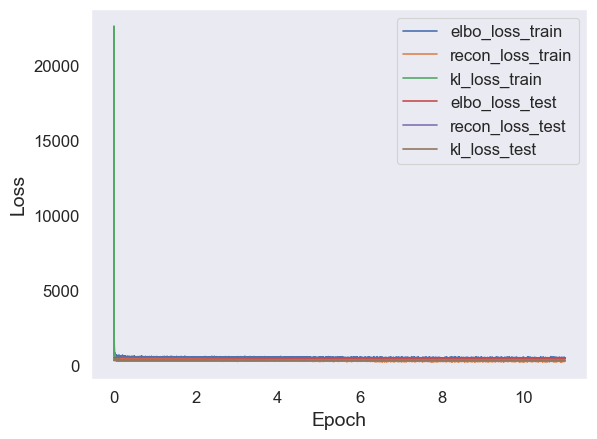

In [161]:
# we center the data, because it helps the model to fit
centered_train_data = train_data * 2 - 1
centered_test_data = test_data * 2 - 1

train_loader = data.DataLoader(centered_train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(centered_test_data, batch_size=BATCH_SIZE)

train_losses, test_losses = train_model(
    model, 
    train_loader, 
    test_loader, 
    epochs=EPOCHS, 
    lr=LR, 
    loss_key='elbo_loss', 
    use_tqdm=True, 
    use_cuda=False, 
    device=device
)
for key, value in test_losses.items():
    print('{}: {:.4f}'.format(key, value[-1]))
plot_training_curves(train_losses, test_losses)

In [ ]:
2048, 3072, 3*32**2

Now we could visualize the model outputs.

1. We could sample new images from our model (sample latent variable from the prior and apply the decoder).
2. We could visualize image reconstructions (apply the encoder and the decoder to the fixed image).
3. Visualize interpolations (apply the encoder to two images $\mathbf{x}_1$ and $\mathbf{x}_2$ to obtain the latent variables $\mathbf{z}_1$ and $\mathbf{z}_2$, apply the decoder to the latent variables $\mathbf{z}$ lying on the segment between $\mathbf{z}_1$ and $\mathbf{z}_2$).

**Note:** it is ok, that your samples are blurry. We do not use difficult architectures and do not tune hyperparameters carefully.

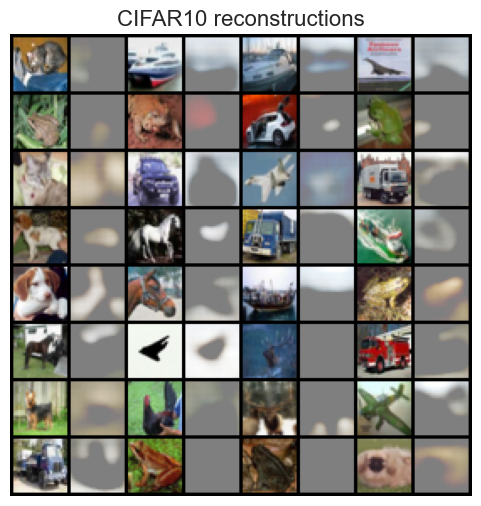

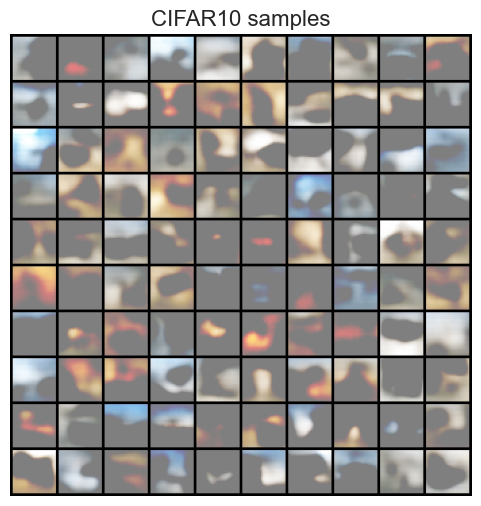

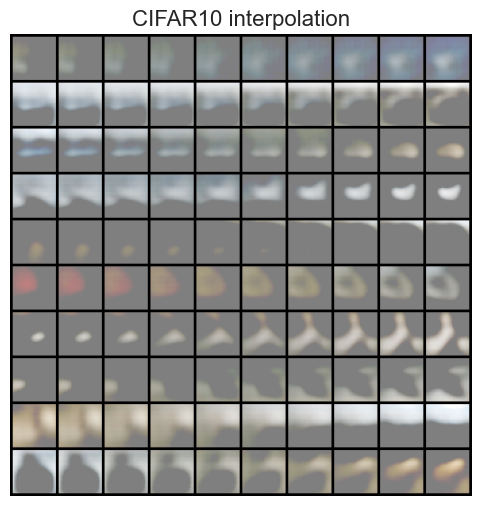

In [162]:
samples = model.to(device).sample(100)

x = next(iter(test_loader))[:50]

if USE_CUDA:
    x = x.cuda()
x = x.to(device)

with torch.no_grad():
    z, _ = model.encoder(x)
    x_recon = torch.clamp(model.decoder(z), -1, 1)
reconstructions = torch.stack((x, x_recon), dim=1).view(-1, 3, 32, 32) * 0.5 + 0.5
reconstructions = reconstructions.cpu().numpy()

x = next(iter(test_loader))[:20].to(device)
with torch.no_grad():
    z, _ = model.encoder(x.to(device))
    z1, z2 = z.chunk(2, dim=0)
    interps = [model.decoder(z1 * (1 - alpha) + z2 * alpha) for alpha in np.linspace(0, 1, 10)]
    interps = torch.stack(interps, dim=1).view(-1, 3, 32, 32)
    interps = torch.clamp(interps, -1, 1) * 0.5 + 0.5
interps = interps.cpu().numpy()

show_samples(reconstructions, 'CIFAR10 reconstructions')
show_samples(samples, 'CIFAR10 samples')
show_samples(interps, 'CIFAR10 interpolation')